In [1]:
import json
import bz2
import regex
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from scipy import sparse
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
from nltk.corpus import stopwords
# from natasha import LocationExtractor
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'retina'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
responses = []
with bz2.BZ2File('../../src/nlp-homeworks-main/banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [00:47, 4190.62it/s]


## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –æ–±—Ä–∞—â–µ–Ω–∏–π –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏

In [3]:
responses[15]

{'city': '–≥. –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É',
 'rating_not_checked': False,
 'title': '–ù–µ—Ç –∑–∞—á–∏—Å–ª–µ–Ω–∏—è –ø–ª–∞—Ç–µ–∂–∞ —á–µ—Ä–µ–∑ –±–∞–Ω–∫–æ–º–∞—Ç –û–¢–ü –±–∞–Ω–∫–∞!',
 'num_comments': 1,
 'bank_license': '–ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766',
 'author': 'tamara-an',
 'bank_name': '–û–¢–ü –ë–∞–Ω–∫',
 'datetime': '2015-06-05 14:01:49',
 'text': '02-06-2015 –±—ã–ª–∏ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω—ã 2 –ø–ª–∞—Ç–µ–∂–∞\xa0—á–µ—Ä–µ–∑ –±–∞–Ω–∫–æ–º–∞—Ç –≤ –≥. –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É –ø–æ –∞–¥—Ä–µ—Å—É –î–æ–±—Ä–æ–≤–æ–ª—å—Å–∫–æ–≥–æ 1\xa0(–æ—Ñ–∏—Å –±–∞–Ω–∫–∞ –û–¢–ü –ë–∞–Ω–∫). –ü–µ—Ä–≤—ã–π –ø–ª–∞—Ç–µ–∂ –≤ 20:39. –í—Ç–æ—Ä–æ–π –ø–ª–∞—Ç–µ–∂ –≤ 20:40. –û–î–ù–ê–ö–û –ø–µ—Ä–≤—ã–π –ø–ª–∞—Ç–µ–∂ —Ç–∞–∫ –∏ –Ω–µ –ø–æ—Å—Ç—É–ø–∏–ª. –ü—Ä–∏ —ç—Ç–æ–º –≤—Ç–æ—Ä–æ–π –ø–ª–∞—Ç–µ–∂ –±—ã–ª –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –º–æ–º–µ–Ω—Ç–∞–ª—å–Ω–æ –∑–∞—á–∏—Å–ª–µ–Ω. –û–ø–ª–∞—Ç–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–∏–ª–∞—Å—å —Å –æ–¥–Ω–æ–π –∏ —Ç–æ–π –∂–µ –∫–∞—Ä—Ç—ã –≤ –æ–¥–Ω–æ–º –∏ —Ç–æ–º –∂–µ –±–∞–Ω–∫–æ–º–∞—Ç–µ. –û –¥–∞–Ω–Ω–æ–π —Å–∏—Ç—É–∞—Ü–∏–∏ –±—ã–ª–æ –Ω–∞–ø–∏—Å–

–ê–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤

In [4]:
data = pd.DataFrame(responses)
data = data.sample(frac=0.05)
data.head(3)

city  rating_not_checked  \
39937         –≥. –ú–æ—Å–∫–≤–∞               False   
46909  –≥. –ù–∏–∂–Ω–µ–≤–∞—Ä—Ç–æ–≤—Å–∫               False   
66909         –≥. –ú–æ—Å–∫–≤–∞               False   

                                                   title  num_comments  \
39937  –î–≤–∞ –≥–æ–¥–∞ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—é—Å—å –ø–µ—Ä–µ–π—Ç–∏ –≤ –ù–ü–§ –°–±–µ—Ä...             0   
46909  –ü—Ä–æ—à—É —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –≤ –∑–∞–∫—Ä—ã—Ç–∏–∏ –º–æ–∏—Ö —Å—á–µ—Ç–æ–≤ —Ä–∞–Ω–µ–µ...             0   
66909            –î–æ–≥–æ–≤–æ—Ä –æ —Å–æ—Ç—Ä—É–¥–Ω–∏—á–µ—Å—Ç–≤–µ —Å –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–º             0   

          bank_license        author        bank_name             datetime  \
39937  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481           l22  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2014-07-22 12:58:00   
46909  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766  sh.tatiana71         –û–¢–ü –ë–∞–Ω–∫  2014-05-22 10:57:00   
66909  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481      katybv86  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2013-11-21 12:39:00   

                                                    text  rating_grade  
39937  –î–≤–∞ –≥–æ–¥–∞ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—é—Å—å –ø–µ—Ä–µ–π—Ç–∏ –≤ –ù–ü–§ –°–±–µ—Ä...           1.0  
46909  –ü—Ä–æ—à—É –≤–∞—Å –∑–∞–∫—Ä—ã—Ç—å –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω—ã–º –¥–æ–≥–æ–≤–æ—Ä–∞–º ‚Ññ1871...           NaN  
66909  –î–æ–±—Ä—ã–π –¥–µ–Ω—å. –•–æ—Ç–µ–ª–∞ –±—ã —É–∑–Ω–∞—Ç—å —É –°–±–µ—Ä–±–∞–Ω–∫–∞,  —Å–∫...           NaN

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15350 entries, 39937 to 17982
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                13840 non-null  object 
 1   rating_not_checked  15350 non-null  bool   
 2   title               15350 non-null  object 
 3   num_comments        15350 non-null  int64  
 4   bank_license        15350 non-null  object 
 5   author              15349 non-null  object 
 6   bank_name           15350 non-null  object 
 7   datetime            15350 non-null  object 
 8   text                15350 non-null  object 
 9   rating_grade        8948 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 1.2+ MB


### 1. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –±–∞–Ω–∫–∞—Ö

In [6]:
# https://habr.com/ru/post/21949/

ct = pd.read_csv('../../src/city.csv', sep=';', encoding='cp1251')
ct.head()

city_id  country_id  region_id           name
0     4400        3159       4312         –ú–æ—Å–∫–≤–∞
1     4313        3159       4312      –ê–±—Ä–∞–º—Ü–µ–≤–æ
2     4314        3159       4312        –ê–ª–∞–±–∏–Ω–æ
3     4315        3159       4312      –ê–ø—Ä–µ–ª–µ–≤–∫–∞
4     4316        3159       4312  –ê—Ä—Ö–∞–Ω–≥–µ–ª—å—Å–∫–æ–µ

In [7]:
X_df1, Y_df2 = data.city, ct.name

speech_recognition = X_df1.to_list()
claim_list = Y_df2.to_list()

In [8]:
import Levenshtein

def n_sort(x=claim_list, y=speech_recognition):
    l = Levenshtein.distance
    result = []
    for i in y:
        b = sorted({r: l(i, r) for r in x}.items(), key = lambda x: x[1])[0]
        result.append(
            ['–í–≤–µ–ª–∏: "{}" - –•–æ—Ç–µ–ª–∏ –≤–≤–µ—Å—Ç–∏: "{}" - –ö–æ–ª-–≤–æ min: "{}"'.format(i, b[0], b[1])]
        ) 
    return result

In [9]:
n_sort(claim_list, speech_recognition[50])

[['–í–≤–µ–ª–∏: "–≥" - –•–æ—Ç–µ–ª–∏ –≤–≤–µ—Å—Ç–∏: "–Ø—è" - –ö–æ–ª-–≤–æ min: "2"'],
 ['–í–≤–µ–ª–∏: "." - –•–æ—Ç–µ–ª–∏ –≤–≤–µ—Å—Ç–∏: "–Ø—è" - –ö–æ–ª-–≤–æ min: "2"'],
 ['–í–≤–µ–ª–∏: " " - –•–æ—Ç–µ–ª–∏ –≤–≤–µ—Å—Ç–∏: "–Ø—è" - –ö–æ–ª-–≤–æ min: "2"'],
 ['–í–≤–µ–ª–∏: "–ú" - –•–æ—Ç–µ–ª–∏ –≤–≤–µ—Å—Ç–∏: "–Ø—è" - –ö–æ–ª-–≤–æ min: "2"'],
 ['–í–≤–µ–ª–∏: "–æ" - –•–æ—Ç–µ–ª–∏ –≤–≤–µ—Å—Ç–∏: "–ü–æ" - –ö–æ–ª-–≤–æ min: "1"'],
 ['–í–≤–µ–ª–∏: "—Å" - –•–æ—Ç–µ–ª–∏ –≤–≤–µ—Å—Ç–∏: "–ò—Å" - –ö–æ–ª-–≤–æ min: "1"'],
 ['–í–≤–µ–ª–∏: "–∫" - –•–æ—Ç–µ–ª–∏ –≤–≤–µ—Å—Ç–∏: "–Ø—è" - –ö–æ–ª-–≤–æ min: "2"'],
 ['–í–≤–µ–ª–∏: "–≤" - –•–æ—Ç–µ–ª–∏ –≤–≤–µ—Å—Ç–∏: "–•–∏–≤" - –ö–æ–ª-–≤–æ min: "2"'],
 ['–í–≤–µ–ª–∏: "–∞" - –•–æ—Ç–µ–ª–∏ –≤–≤–µ—Å—Ç–∏: "–£—Ñ–∞" - –ö–æ–ª-–≤–æ min: "2"']]

–õ–µ–≤–∏–Ω—à—Ç–µ–π–Ω –Ω–µ –≤–µ–∑–¥–µ —Å–ø—Ä–∞–≤–∏–ª—Å—è :
 ['–í–≤–µ–ª–∏: "–≥. –¢–∞–≥–∞–Ω—Ä–æ–≥ (–†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª.)" - –•–æ—Ç–µ–ª–∏ –≤–≤–µ—Å—Ç–∏: "–°—É—Ä–≥—É—Ç (–°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª.)" - –ö–æ–ª-–≤–æ min: "16"'],

In [10]:
from natasha import LocationExtractor

def extract_city(text):
    if isinstance(text, str):
        extractor = LocationExtractor()
        matches = extractor(text)
        if len(matches) > 0:
            return matches[0].fact.name
        else:
            return None
    else:
        return None

In [11]:
cities = pd.DataFrame(data.city.unique(), columns=['orig_name'])
cities['clean_name'] = cities['orig_name'].apply(extract_city)

In [12]:
cities.head()

orig_name       clean_name
0           –≥. –ú–æ—Å–∫–≤–∞           –º–æ—Å–∫–≤–∞
1    –≥. –ù–∏–∂–Ω–µ–≤–∞—Ä—Ç–æ–≤—Å–∫    –Ω–∏–∂–Ω–µ–≤–∞—Ä—Ç–æ–≤—Å–∫
2   –≥. –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É           —Ä–æ—Å—Ç–æ–≤
3  –≥. –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥  –Ω–∏–∂–Ω–∏–π –Ω–æ–≤–≥–æ—Ä–æ–¥
4          –≥. –°–∞–ª–∞–≤–∞—Ç          —Å–∞–ª–∞–≤–∞—Ç

In [13]:
on = cities.orig_name.value_counts().sum()
cn = cities.clean_name.value_counts().sum()

print('\n{0}'.format(int(on-cn)))


159


In [14]:
data['clean_city'] = data['city'].replace(cities['orig_name'].tolist(), cities['clean_name'].str.title().tolist())

In [15]:
data.head(3)

city  rating_not_checked  \
39937         –≥. –ú–æ—Å–∫–≤–∞               False   
46909  –≥. –ù–∏–∂–Ω–µ–≤–∞—Ä—Ç–æ–≤—Å–∫               False   
66909         –≥. –ú–æ—Å–∫–≤–∞               False   

                                                   title  num_comments  \
39937  –î–≤–∞ –≥–æ–¥–∞ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—é—Å—å –ø–µ—Ä–µ–π—Ç–∏ –≤ –ù–ü–§ –°–±–µ—Ä...             0   
46909  –ü—Ä–æ—à—É —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –≤ –∑–∞–∫—Ä—ã—Ç–∏–∏ –º–æ–∏—Ö —Å—á–µ—Ç–æ–≤ —Ä–∞–Ω–µ–µ...             0   
66909            –î–æ–≥–æ–≤–æ—Ä –æ —Å–æ—Ç—Ä—É–¥–Ω–∏—á–µ—Å—Ç–≤–µ —Å –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–º             0   

          bank_license        author        bank_name             datetime  \
39937  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481           l22  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2014-07-22 12:58:00   
46909  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766  sh.tatiana71         –û–¢–ü –ë–∞–Ω–∫  2014-05-22 10:57:00   
66909  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481      katybv86  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2013-11-21 12:39:00   

                                                    text  rating_grade  \
39937  –î–≤–∞ –≥–æ–¥–∞ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—é—Å—å –ø–µ—Ä–µ–π—Ç–∏ –≤ –ù–ü–§ –°–±–µ—Ä...           1.0   
46909  –ü—Ä–æ—à—É –≤–∞—Å –∑–∞–∫—Ä—ã—Ç—å –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω—ã–º –¥–æ–≥–æ–≤–æ—Ä–∞–º ‚Ññ1871...           NaN   
66909  –î–æ–±—Ä—ã–π –¥–µ–Ω—å. –•–æ—Ç–µ–ª–∞ –±—ã —É–∑–Ω–∞—Ç—å —É –°–±–µ—Ä–±–∞–Ω–∫–∞,  —Å–∫...           NaN   

          clean_city  
39937         –ú–æ—Å–∫–≤–∞  
46909  –ù–∏–∂–Ω–µ–≤–∞—Ä—Ç–æ–≤—Å–∫  
66909         –ú–æ—Å–∫–≤–∞

–ü–æ—Å–º–æ—Ç—Ä–µ–≤ –±–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ –Ω–∞ –¥–∞–Ω–Ω—ã–µ —É —Å—Ç–æ–ª–±—Ü–∞ 'city' –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –∑–Ω–∞—á–µ–Ω–∏—è None –∏ –∫–∞–∫ —Å–ª–µ–¥—Å—Ç–≤–∏–µ —É 'clean_city' —Ç–æ–∂–µ, —á—Ç–æ–±—ã –ø–æ—á–∏—Å—Ç–∏—Ç—å ds –æ—Ç –∞–Ω–æ–º–∞–ª–∏–π –æ—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –µ–≥–æ –ø–æ —ç—Ç–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É.

In [16]:
df_base = data.copy() # –∫–æ–ø–∏—è
df_isna = data[pd.isna(data.clean_city)] # NaN

# –±–µ–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤
df_notna = data[pd.notna(data.clean_city)]

In [40]:
# df_base.city.value_counts(dropna=False)

In [17]:
df_notna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13500 entries, 39937 to 17982
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                13500 non-null  object 
 1   rating_not_checked  13500 non-null  bool   
 2   title               13500 non-null  object 
 3   num_comments        13500 non-null  int64  
 4   bank_license        13500 non-null  object 
 5   author              13500 non-null  object 
 6   bank_name           13500 non-null  object 
 7   datetime            13500 non-null  object 
 8   text                13500 non-null  object 
 9   rating_grade        7370 non-null   float64
 10  clean_city          13500 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 1.1+ MB


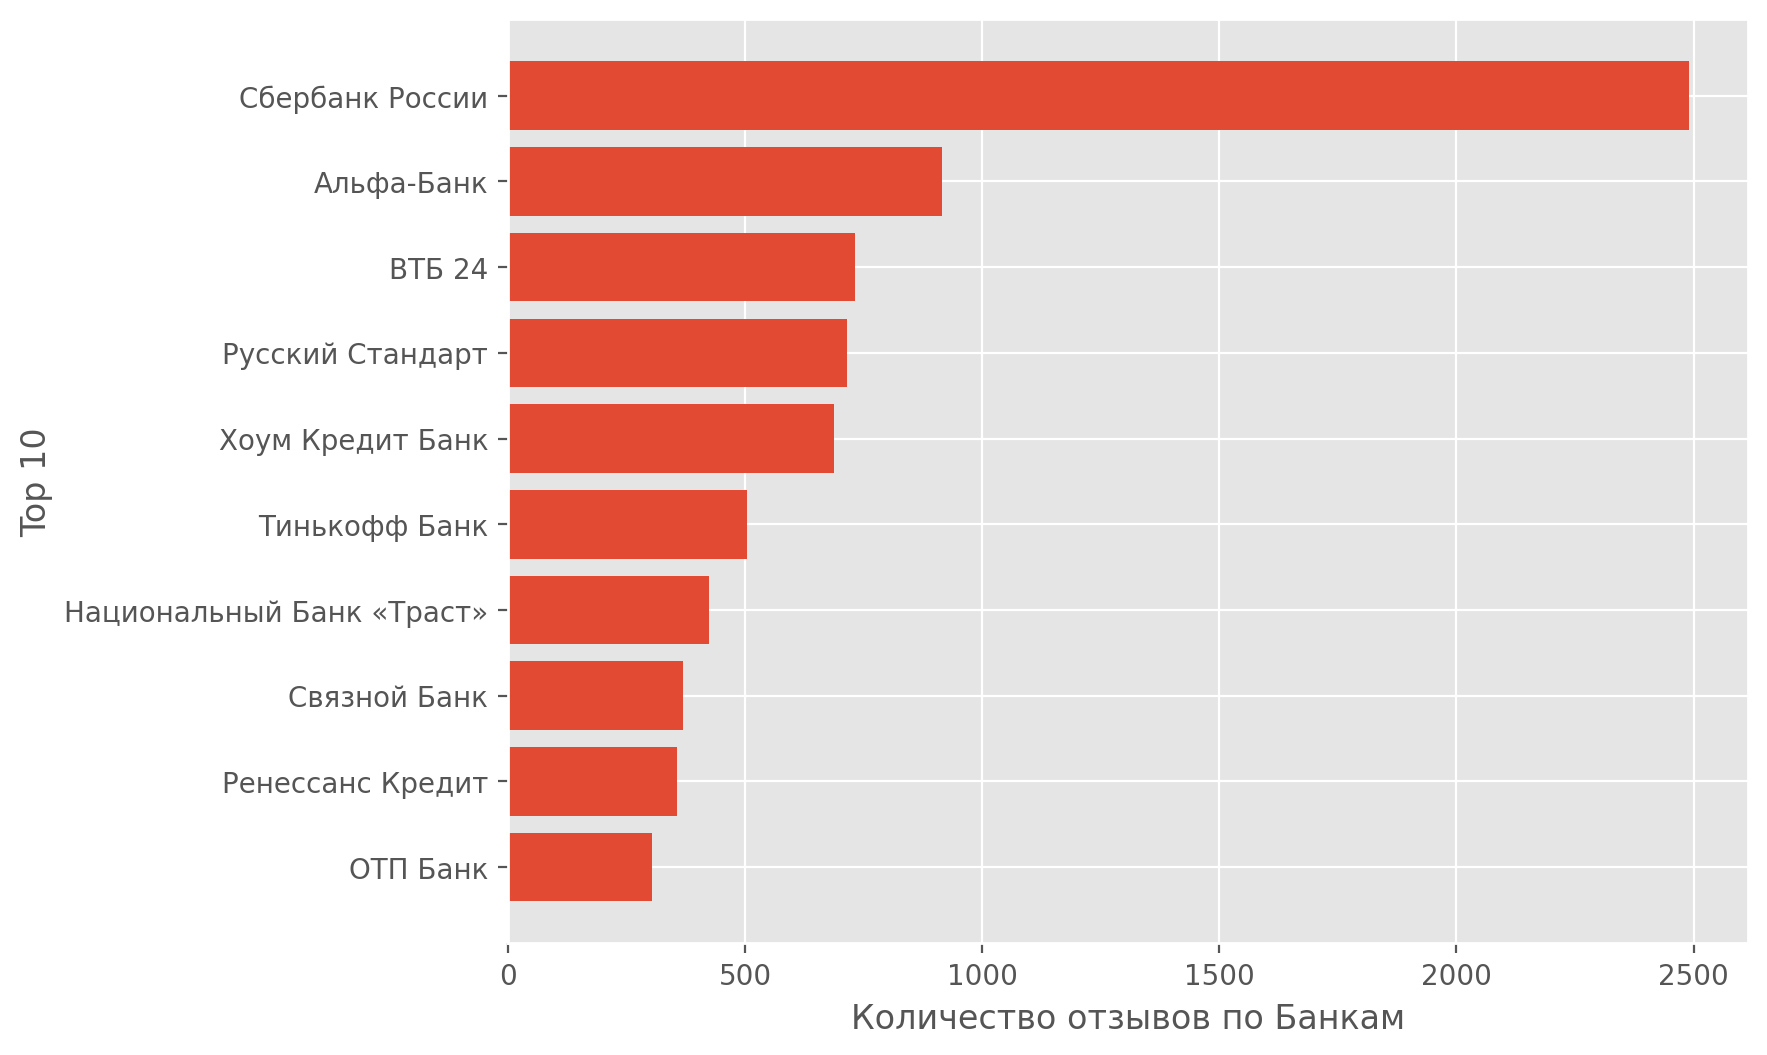

In [18]:
banks = df_notna.groupby(['bank_name']).count()['text'].sort_values(ascending=False).head(10)
rcParams['figure.figsize'] = 8, 6
plt.barh(banks.index[::-1],banks.values[::-1])
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –ë–∞–Ω–∫–∞–º')
plt.ylabel('Top 10')
plt.show()

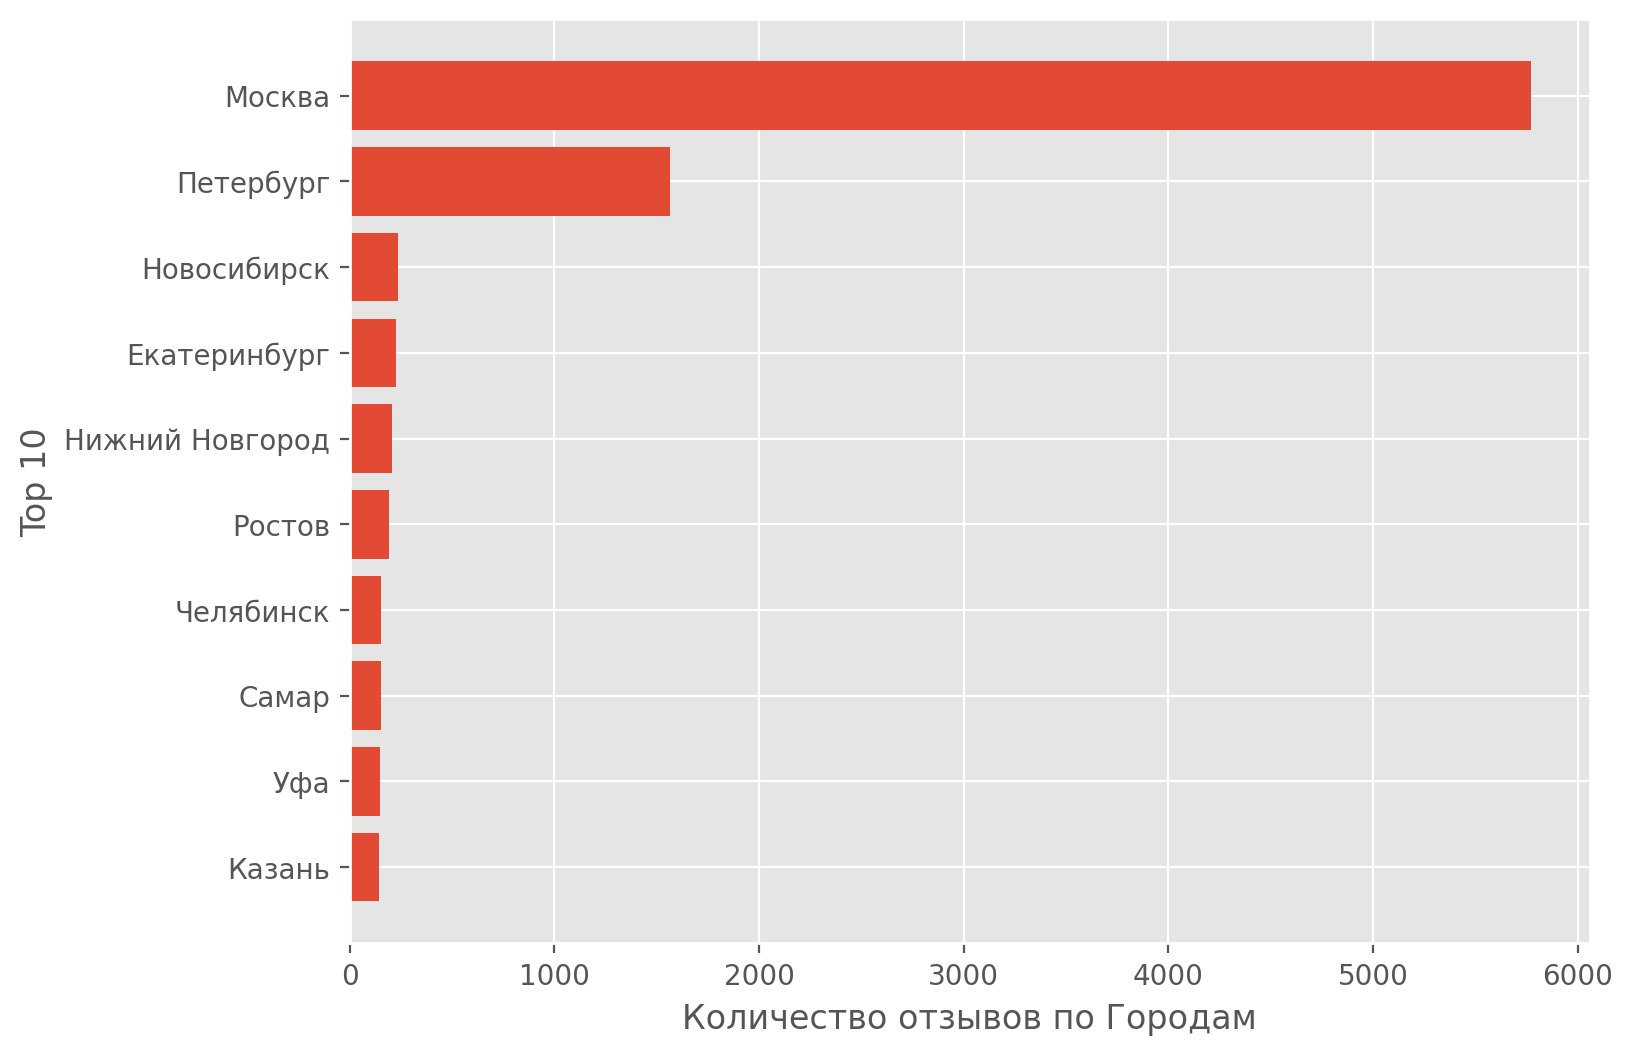

In [19]:
cities = df_notna.groupby(['clean_city']).count()['text'].sort_values(ascending=False).head(10)
rcParams['figure.figsize'] = 8, 6
plt.barh(cities.index[::-1],cities.values[::-1])
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –ì–æ—Ä–æ–¥–∞–º')
plt.ylabel('Top 10')
plt.show()

–ú–æ—Å–∫–≤–∞ –∏ –ü–∏—Ç–µ—Ä –æ—á–µ–≤–∏–¥–Ω–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —á–∞—â–µ —á–µ–º –¥—Ä—É–≥–∏–µ –¥–∞–Ω–Ω—ã–µ

### 2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º –¥–ª–∏–Ω —Å–ª–æ–≤

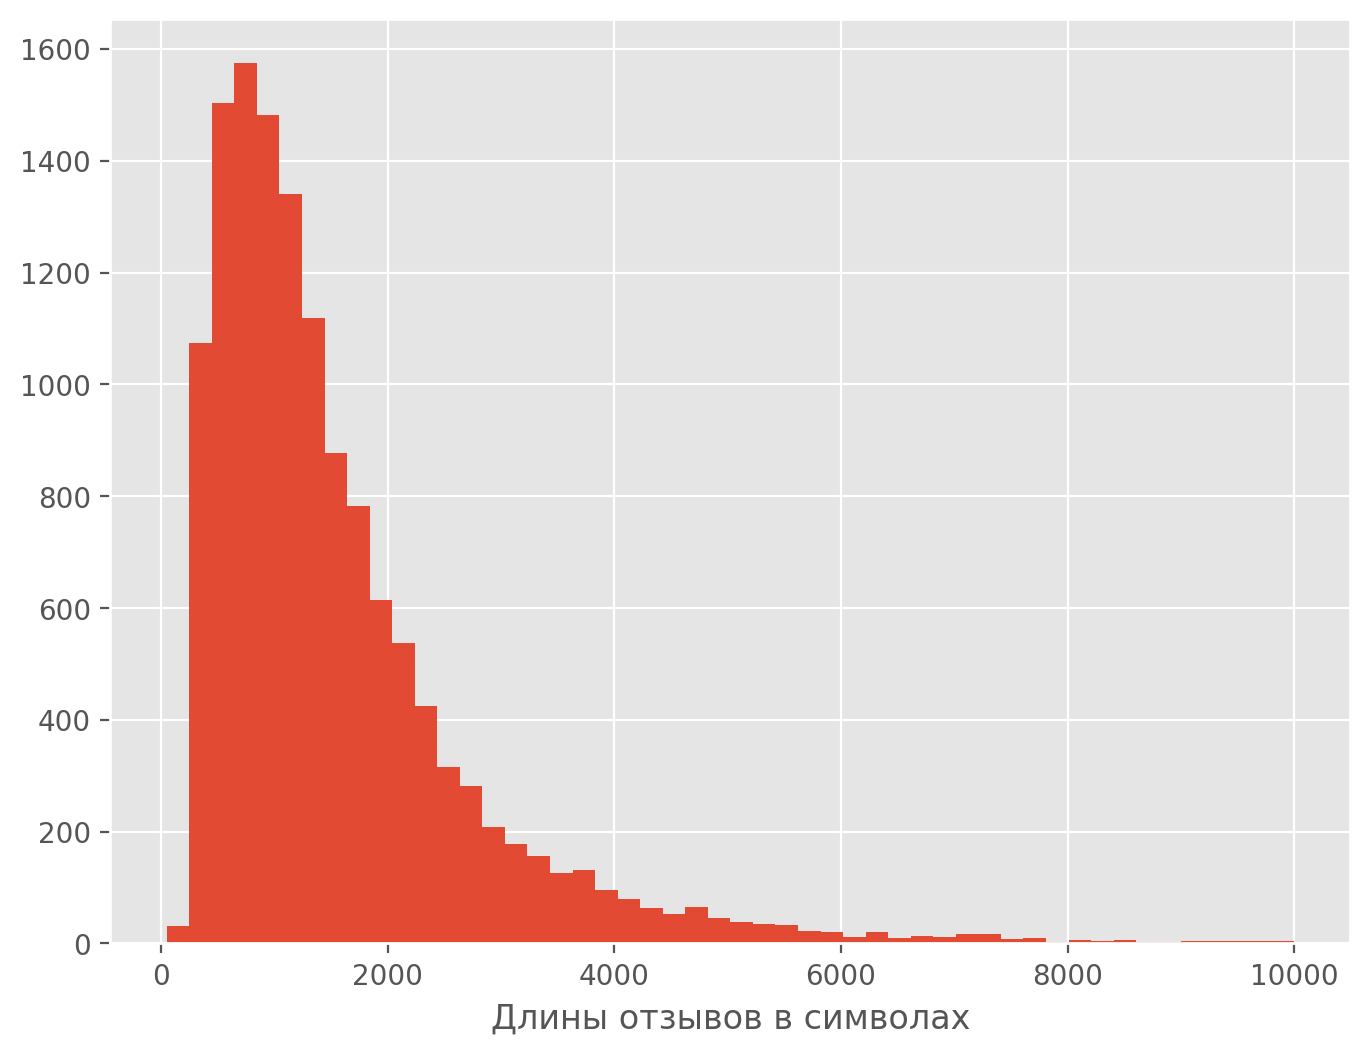

In [20]:
len_c = df_notna.text.apply(len)
rcParams['figure.figsize'] = 8, 6
len_c[len_c<10000].plot(kind='hist',bins=50)
plt.xlabel('–î–ª–∏–Ω—ã –æ—Ç–∑—ã–≤–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö')
plt.ylabel('')
plt.show()

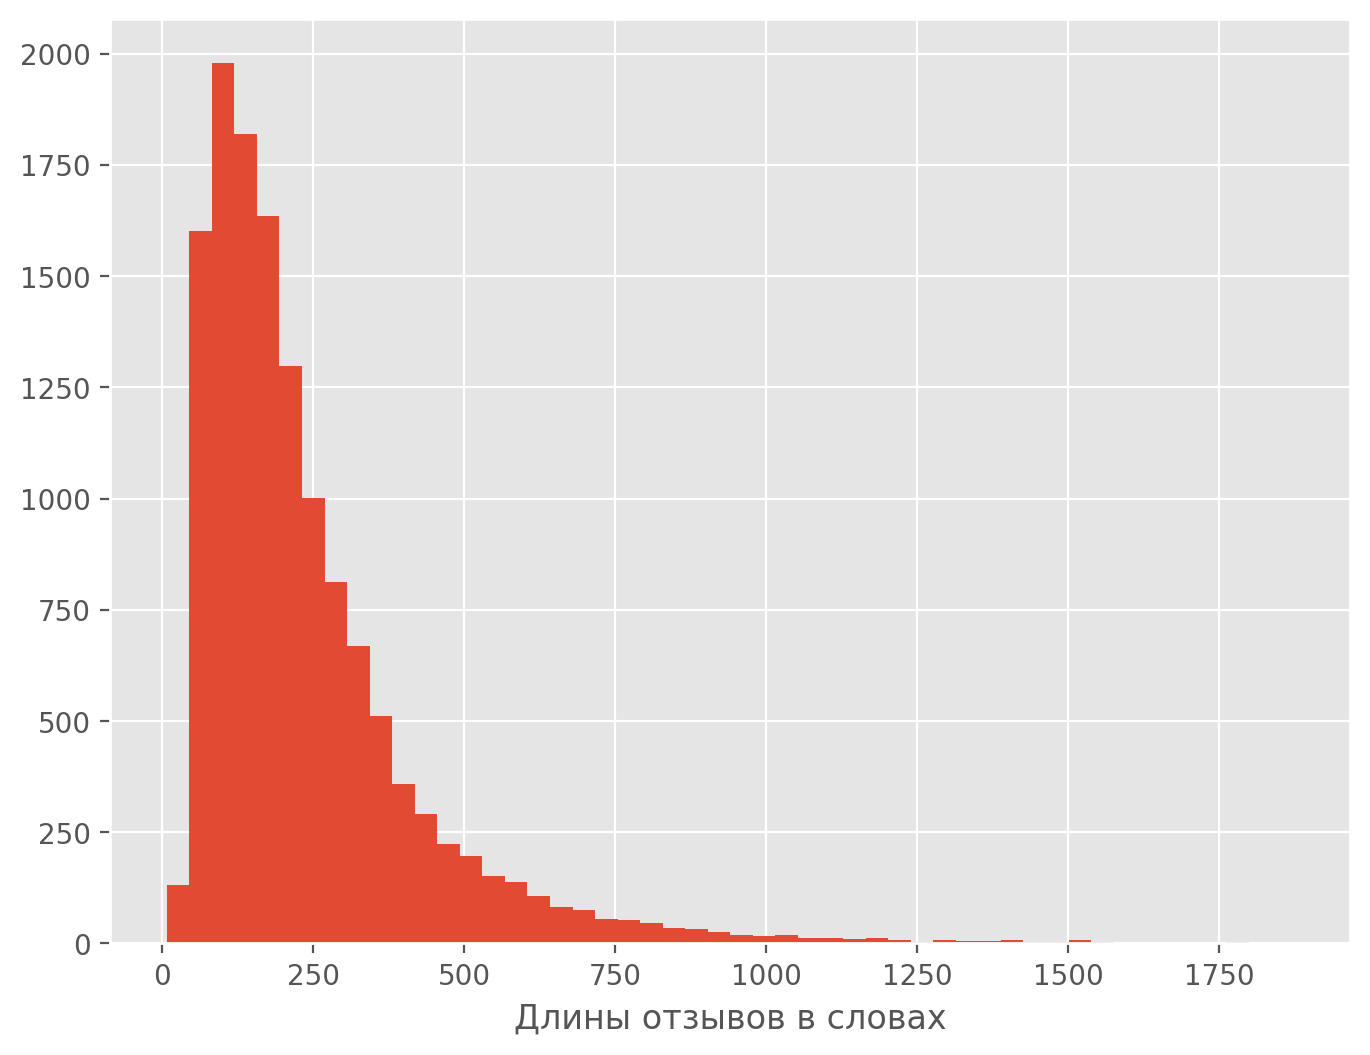

In [21]:
len_t = df_notna.text.str.split().apply(len)
rcParams['figure.figsize'] = 8, 6
len_t[len_t<2000].plot(kind='hist',bins=50)
plt.xlabel('–î–ª–∏–Ω—ã –æ—Ç–∑—ã–≤–æ–≤ –≤ —Å–ª–æ–≤–∞—Ö')
plt.ylabel('')
plt.show()

### 3. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö:
- —Å–ª–æ–≤
- —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤
- –ª–µ–º–º
- —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö

#### –°–ª–æ–≤–∞

In [22]:
regex = re.compile("[–ê-–Ø–∞-—è]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

In [23]:
df = df_notna.copy()
df['text_tokinized'] =  df.text.str.lower().apply(words_only)

In [24]:
from tqdm import tqdm_notebook as tqdm
from collections import Counter

cnt = Counter()
n_types = []
n_tokens = []
tokens = []

for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens = row['text_tokinized'].split()
    cnt.update(tokens)
    n_types.append(len(cnt))
    n_tokens.append(sum(list(cnt.values())))

for i in cnt.most_common(10):
    print(i)

  0%|          | 0/13500 [00:00<?, ?it/s]

('–≤', 117887)
('–∏', 94058)
('–Ω–µ', 76413)
('–Ω–∞', 62778)
('—á—Ç–æ', 57285)
('—è', 51610)
('—Å', 41430)
('–ø–æ', 33484)
('–º–Ω–µ', 28931)
('–±–∞–Ω–∫–∞', 24550)


#### C–ª–æ–≤–∞ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤

In [25]:
from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')

mystopwords = stopwords.words('russian') + ['—ç—Ç–æ', '–Ω–∞—à' , '—Ç—ã—Å', '–º–ª–Ω', '–º–ª—Ä–¥', '—Ç–∞–∫–∂–µ', '—Ç', '–¥', '–≥']
def remove_stopwords(text, mystopwords=mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

In [26]:
df['text_tokinized_stop_worlds'] = df.text_tokinized.str.lower().apply(remove_stopwords)

In [27]:
df.head(3)

city  rating_not_checked  \
39937         –≥. –ú–æ—Å–∫–≤–∞               False   
46909  –≥. –ù–∏–∂–Ω–µ–≤–∞—Ä—Ç–æ–≤—Å–∫               False   
66909         –≥. –ú–æ—Å–∫–≤–∞               False   

                                                   title  num_comments  \
39937  –î–≤–∞ –≥–æ–¥–∞ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—é—Å—å –ø–µ—Ä–µ–π—Ç–∏ –≤ –ù–ü–§ –°–±–µ—Ä...             0   
46909  –ü—Ä–æ—à—É —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –≤ –∑–∞–∫—Ä—ã—Ç–∏–∏ –º–æ–∏—Ö —Å—á–µ—Ç–æ–≤ —Ä–∞–Ω–µ–µ...             0   
66909            –î–æ–≥–æ–≤–æ—Ä –æ —Å–æ—Ç—Ä—É–¥–Ω–∏—á–µ—Å—Ç–≤–µ —Å –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–º             0   

          bank_license        author        bank_name             datetime  \
39937  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481           l22  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2014-07-22 12:58:00   
46909  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766  sh.tatiana71         –û–¢–ü –ë–∞–Ω–∫  2014-05-22 10:57:00   
66909  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481      katybv86  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2013-11-21 12:39:00   

                                                    text  rating_grade  \
39937  –î–≤–∞ –≥–æ–¥–∞ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—é—Å—å –ø–µ—Ä–µ–π—Ç–∏ –≤ –ù–ü–§ –°–±–µ—Ä...           1.0   
46909  –ü—Ä–æ—à—É –≤–∞—Å –∑–∞–∫—Ä—ã—Ç—å –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω—ã–º –¥–æ–≥–æ–≤–æ—Ä–∞–º ‚Ññ1871...           NaN   
66909  –î–æ–±—Ä—ã–π –¥–µ–Ω—å. –•–æ—Ç–µ–ª–∞ –±—ã —É–∑–Ω–∞—Ç—å —É –°–±–µ—Ä–±–∞–Ω–∫–∞,  —Å–∫...           NaN   

          clean_city                                     text_tokinized  \
39937         –ú–æ—Å–∫–≤–∞  –¥–≤–∞ –≥–æ–¥–∞ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—é—Å—å –ø–µ—Ä–µ–π—Ç–∏ –≤ –Ω–ø—Ñ —Å–±–µ—Ä...   
46909  –ù–∏–∂–Ω–µ–≤–∞—Ä—Ç–æ–≤—Å–∫  –ø—Ä–æ—à—É –≤–∞—Å –∑–∞–∫—Ä—ã—Ç—å –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω—ã–º –¥–æ–≥–æ–≤–æ—Ä–∞–º –∏ –Ω–∞ ...   
66909         –ú–æ—Å–∫–≤–∞  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —Ö–æ—Ç–µ–ª–∞ –±—ã —É–∑–Ω–∞—Ç—å —É —Å–±–µ—Ä–±–∞–Ω–∫–∞ —Å–∫–æ–ª—å...   

                              text_tokinized_stop_worlds  
39937  –≥–æ–¥–∞ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—é—Å—å –ø–µ—Ä–µ–π—Ç–∏ –Ω–ø—Ñ —Å–±–µ—Ä–±–∞–Ω–∫–∞ ...  
46909  –ø—Ä–æ—à—É –∑–∞–∫—Ä—ã—Ç—å –∫—Ä–µ–¥–∏—Ç–Ω—ã–º –¥–æ–≥–æ–≤–æ—Ä–∞–º –æ–±—â–µ–Ω–∏—é —Å—É–º–º...  
66909  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —Ö–æ—Ç–µ–ª–∞ —É–∑–Ω–∞—Ç—å —Å–±–µ—Ä–±–∞–Ω–∫–∞ —Å–∫–æ–ª—å–∫–æ –≤–∞...

In [28]:
cnt = Counter()
n_types = []
n_tokens = []
tokens = []
tokens_all=[]

for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens = row['text_tokinized_stop_worlds'].split()
    tokens_all+=tokens
    cnt.update(tokens)
    n_types.append(len(cnt))
    n_tokens.append(sum(cnt.values()))
    
for i in cnt.most_common(10):
    print(i)

  0%|          | 0/13500 [00:00<?, ?it/s]

('–±–∞–Ω–∫–∞', 24550)
('–±–∞–Ω–∫', 19322)
('–¥–µ–Ω—å–≥–∏', 11584)
('–∫–∞—Ä—Ç—É', 9816)
('–∫–∞—Ä—Ç—ã', 9567)
('–∫—Ä–µ–¥–∏—Ç', 7188)
('–¥–µ–Ω—å', 6978)
('–∑–∞—è–≤–ª–µ–Ω–∏–µ', 6547)
('–±–∞–Ω–∫–µ', 6362)
('–≤—Ä–µ–º—è', 5882)


–ë–µ–∑ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –õ–µ–º–º –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –ø–æ —Å–º—ã—Å–ª—É —Å–ª–æ–≤–∞ —Å—á–∏—Ç–∞—é—Ç—Å—è –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ

#### –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –õ–µ–º–º—ã

In [29]:
from pymorphy2 import MorphAnalyzer
from pymystem3 import Mystem

In [30]:
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [31]:
mystoplemmas = stopwords.words('russian') + ['–∫–æ—Ç–æ—Ä—ã–π','–ø—Ä–æ—à–ª—ã–π','—Å–µ–π', '—Å–≤–æ–π', '–Ω–∞—à', '–º–æ—á—å', '–≥']

def remove_stoplemmas(text, mystoplemmas=mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

In [32]:
df['lemma'] = df['text_tokinized_stop_worlds'].apply(lemmatize)

In [36]:
### –¥–æ –Ω–µ–≥–æ –æ—Å—Ç–∞–≤–∏–ª –Ω–∞ –∑–∞–ø—É—Å–∫–µ, –ø–æ—Å–ª–µ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å
df.size

1918

In [33]:
df['lemma']

39937     –≥–æ–¥ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—Ç—å—Å—è –ø–µ—Ä–µ—Ö–æ–¥–∏—Ç—å –Ω–ø—Ñ —Å–±–µ—Ä–±–∞–Ω...
46909     –ø—Ä–æ—Å–∏—Ç—å –∑–∞–∫—Ä—ã–≤–∞—Ç—å –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –¥–æ–≥–æ–≤–æ—Ä –æ–±—â–µ–Ω–∏–µ —Å—É...
66909     –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —Ö–æ—Ç–µ—Ç—å —É–∑–Ω–∞–≤–∞—Ç—å —Å–±–µ—Ä–±–∞–Ω–∫ —Å–∫–æ–ª—å–∫–æ –≤...
5923      —É–≤–∞–∂–∞–µ–º—ã–π –≥–æ—Å–ø–æ–¥–∏–Ω –æ—Ç–≤–µ—á–∞—Ç—å –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –≤–∏–¥–µ—Ç—å ...
99106     –≥–æ–¥ –≤–∑—è—Ç—å –∏–ø–æ—Ç–µ—á–Ω—ã–π –∫—Ä–µ–¥–∏—Ç –∞–±–∞ —Ñ–∏–Ω–∞–Ω—Å –±–∞–Ω–∫ —Ä–µ—à...
                                ...                        
120697    —Å–µ–≥–æ–¥–Ω—è —É—Ç—Ä–æ –æ—Ç–ø—Ä–∞–≤–ª—è—Ç—å –ø–µ—Ä–µ–≤–æ–¥ –¥–µ–Ω–µ–∂–Ω—ã–π —Å—Ä–µ–¥—Å...
55150     –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∞–ª—å—Ñ–∞ –∫–ª–∏–∫ –æ–ø–ª–∞—Ç–∞ –º–æ–±–∏–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä...
22798     —Å–µ–≥–æ–¥–Ω—è –±–∞–Ω–∫–æ–º–∞—Ç —Å–ø–∏—Å—ã–≤–∞—Ç—å –¥–µ–Ω—å–≥–∏ –≤—ã–¥–∞–≤–∞—Ç—å —Å—É–º...
44641     –Ω–∞–ø–∏—Å–∞—Ç—å –Ω–∞–¥–µ—è—Ç—å—Å—è –æ—Ç–≤–µ—Ç —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫ –ø–æ–º–æ—â—å...
17982     –æ–∫—Ç—è–±—Ä—å –≥–æ–¥ —É

In [34]:
df.head(3)

city  rating_not_checked  \
39937         –≥. –ú–æ—Å–∫–≤–∞               False   
46909  –≥. –ù–∏–∂–Ω–µ–≤–∞—Ä—Ç–æ–≤—Å–∫               False   
66909         –≥. –ú–æ—Å–∫–≤–∞               False   

                                                   title  num_comments  \
39937  –î–≤–∞ –≥–æ–¥–∞ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—é—Å—å –ø–µ—Ä–µ–π—Ç–∏ –≤ –ù–ü–§ –°–±–µ—Ä...             0   
46909  –ü—Ä–æ—à—É —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è –≤ –∑–∞–∫—Ä—ã—Ç–∏–∏ –º–æ–∏—Ö —Å—á–µ—Ç–æ–≤ —Ä–∞–Ω–µ–µ...             0   
66909            –î–æ–≥–æ–≤–æ—Ä –æ —Å–æ—Ç—Ä—É–¥–Ω–∏—á–µ—Å—Ç–≤–µ —Å –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–º             0   

          bank_license        author        bank_name             datetime  \
39937  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481           l22  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2014-07-22 12:58:00   
46909  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766  sh.tatiana71         –û–¢–ü –ë–∞–Ω–∫  2014-05-22 10:57:00   
66909  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481      katybv86  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2013-11-21 12:39:00   

                                                    text  rating_grade  \
39937  –î–≤–∞ –≥–æ–¥–∞ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—é—Å—å –ø–µ—Ä–µ–π—Ç–∏ –≤ –ù–ü–§ –°–±–µ—Ä...           1.0   
46909  –ü—Ä–æ—à—É –≤–∞—Å –∑–∞–∫—Ä—ã—Ç—å –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω—ã–º –¥–æ–≥–æ–≤–æ—Ä–∞–º ‚Ññ1871...           NaN   
66909  –î–æ–±—Ä—ã–π –¥–µ–Ω—å. –•–æ—Ç–µ–ª–∞ –±—ã —É–∑–Ω–∞—Ç—å —É –°–±–µ—Ä–±–∞–Ω–∫–∞,  —Å–∫...           NaN   

          clean_city                                     text_tokinized  \
39937         –ú–æ—Å–∫–≤–∞  –¥–≤–∞ –≥–æ–¥–∞ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—é—Å—å –ø–µ—Ä–µ–π—Ç–∏ –≤ –Ω–ø—Ñ —Å–±–µ—Ä...   
46909  –ù–∏–∂–Ω–µ–≤–∞—Ä—Ç–æ–≤—Å–∫  –ø—Ä–æ—à—É –≤–∞—Å –∑–∞–∫—Ä—ã—Ç—å –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω—ã–º –¥–æ–≥–æ–≤–æ—Ä–∞–º –∏ –Ω–∞ ...   
66909         –ú–æ—Å–∫–≤–∞  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —Ö–æ—Ç–µ–ª–∞ –±—ã —É–∑–Ω–∞—Ç—å —É —Å–±–µ—Ä–±–∞–Ω–∫–∞ —Å–∫–æ–ª—å...   

                              text_tokinized_stop_worlds  \
39937  –≥–æ–¥–∞ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—é—Å—å –ø–µ—Ä–µ–π—Ç–∏ –Ω–ø—Ñ —Å–±–µ—Ä–±–∞–Ω–∫–∞ ...   
46909  –ø—Ä–æ—à—É –∑–∞–∫—Ä—ã—Ç—å –∫—Ä–µ–¥–∏—Ç–Ω—ã–º –¥–æ–≥–æ–≤–æ—Ä–∞–º –æ–±—â–µ–Ω–∏—é —Å—É–º–º...   
66909  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —Ö–æ—Ç–µ–ª–∞ —É–∑–Ω–∞—Ç—å —Å–±–µ—Ä–±–∞–Ω–∫–∞ —Å–∫–æ–ª—å–∫–æ –≤–∞...   

                                                   lemma  
39937  –≥–æ–¥ –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞—Ç—å—Å—è –ø–µ—Ä–µ—Ö–æ–¥–∏—Ç—å –Ω–ø—Ñ —Å–±–µ—Ä–±–∞–Ω...  
46909  –ø—Ä–æ—Å–∏—Ç—å –∑–∞–∫—Ä—ã–≤–∞—Ç—å –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –¥–æ–≥–æ–≤–æ—Ä –æ–±—â–µ–Ω–∏–µ —Å—É...  
66909  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —Ö–æ—Ç–µ—Ç—å —É–∑–Ω–∞–≤–∞—Ç—å —Å–±–µ—Ä–±–∞–Ω–∫ —Å–∫–æ–ª—å–∫–æ –≤...

In [35]:
cnt = Counter()
n_types = []
n_tokens = []
tokens = []
tokens_all=[]

for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens = row['lemma'].split()
    cnt.update(tokens)
    n_types.append(len(cnt))
    tokens_all+=tokens
    n_tokens.append(sum(list(cnt.values())))
    
for i in cnt.most_common(10):
    print(i)

  0%|          | 0/13500 [00:00<?, ?it/s]

('–±–∞–Ω–∫', 55319)
('–∫–∞—Ä—Ç–∞', 30968)
('–¥–µ–Ω—å–≥–∏', 15813)
('–¥–µ–Ω—å', 15533)
('–º–æ–π', 14763)
('–∫—Ä–µ–¥–∏—Ç', 13875)
('–∫–æ—Ç–æ—Ä—ã–π', 13440)
('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 12525)
('–∫–ª–∏–µ–Ω—Ç', 12080)
('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', 12053)


#### –°—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–µ

In [36]:
m=MorphAnalyzer()
def to_nouns(text, mystem=m):
    try:
        return " ".join([noun for noun in text.split() if m.parse(noun)[0].tag.POS =='NOUN'])
    except:
        return []

to_nouns(df.lemma.iloc[2])

'–¥–µ–Ω—å —Å–±–µ—Ä–±–∞–Ω–∫ –≤—Ä–µ–º—è –±–∞–Ω–∫ –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫ –∫–æ–º–ø–∞–Ω–∏—è –Ω–µ–¥–µ–ª—è –≤–æ–ø—Ä–æ—Å –±–∞–Ω–∫ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –∏–ø–æ—Ç–µ–∫–∞ –ø–æ–∫—É–ø–∫–∞ –∂–∏–ª—å–µ –Ω–µ–¥–µ–ª—è –º–æ—á—å —Å–±–µ—Ä–±–∞–Ω–∫ –∫–æ–Ω–µ—Ü –≥–æ–¥ –Ω–µ–¥–µ–ª—è —Ä–∞—Å—á–µ—Ç —Ä–æ—Å—Å–∏—è –±—É–º–∞–≥–∞'

In [37]:
df['nouns'] = df['lemma'].apply(to_nouns)

In [98]:
from multiprocessing import Pool

with Pool() as p:
    df['nouns']=p.map(to_nouns,df.lemma)

In [38]:
cnt_noun = Counter()
n_types_noun = []
n_tokens_noun= []
tokens_noun = []
tokens_all_noun=[]

for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens = row['nouns'].split()
    cnt_noun.update(tokens)
    n_types_noun.append(len(cnt))
    tokens_all_noun+=tokens
    n_tokens_noun.append(sum(cnt.values()))

for i in cnt_noun.most_common(10):
    print(i)

  0%|          | 0/13500 [00:00<?, ?it/s]

('–±–∞–Ω–∫', 55319)
('–∫–∞—Ä—Ç–∞', 30968)
('–¥–µ–Ω—å–≥–∏', 15813)
('–¥–µ–Ω—å', 15533)
('–∫—Ä–µ–¥–∏—Ç', 13875)
('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 12525)
('–∫–ª–∏–µ–Ω—Ç', 12080)
('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', 12053)
('—Å—á–µ—Ç', 11382)
('—Å—É–º–º–∞', 10137)


### 4. –ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞

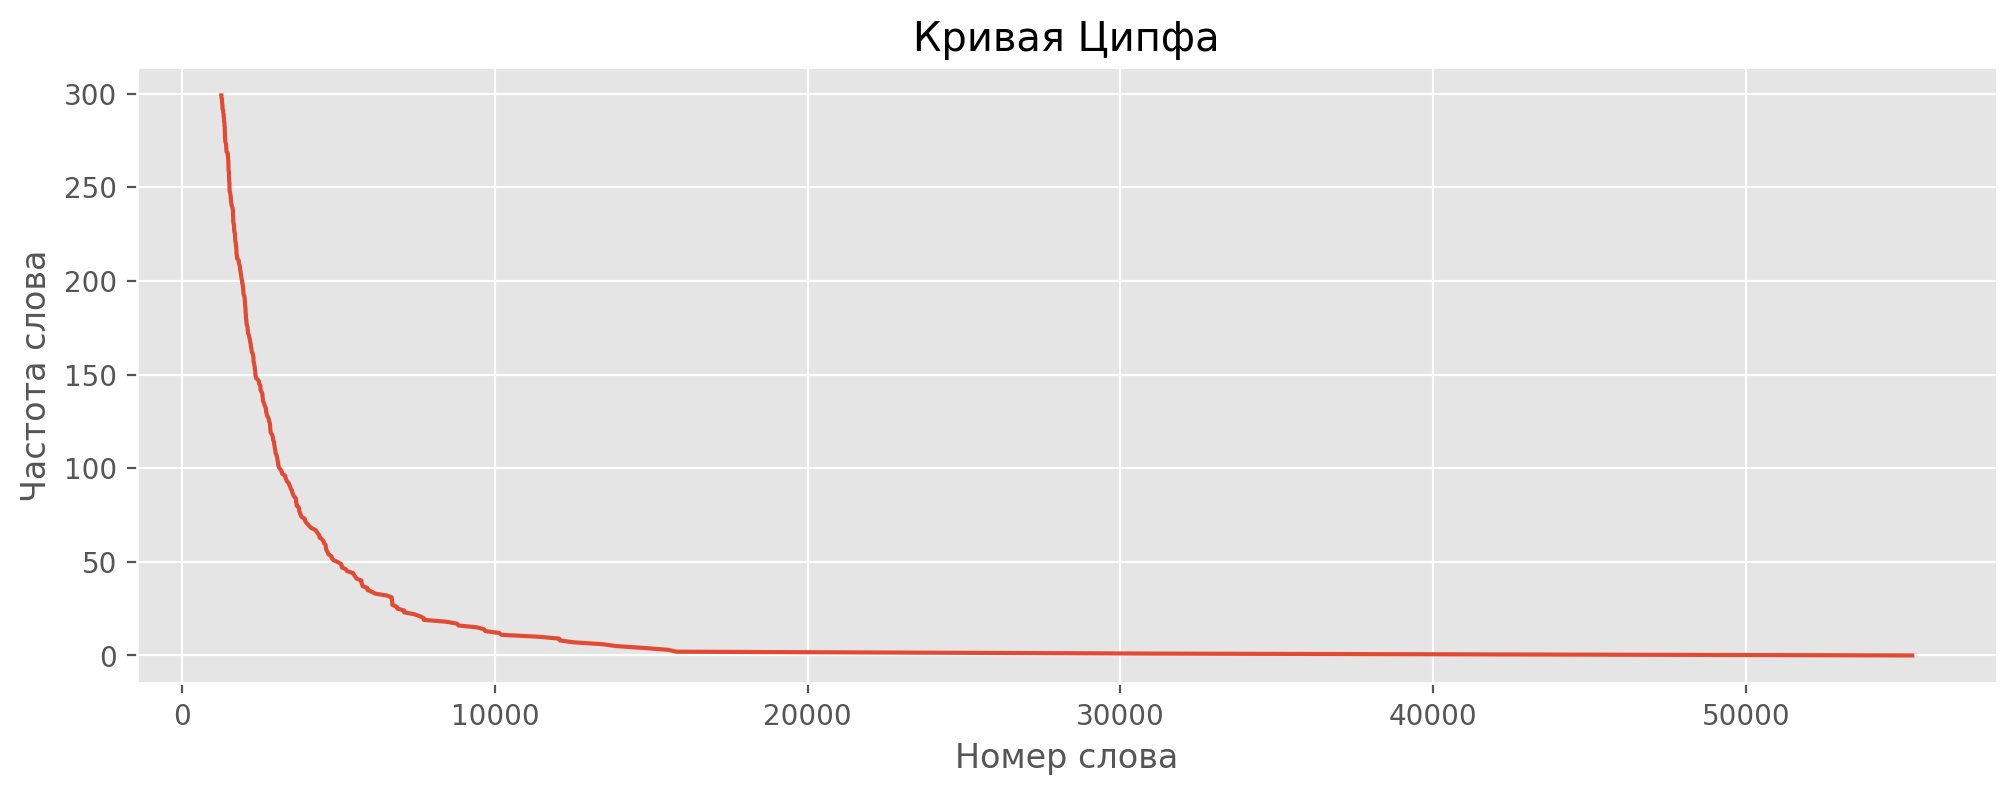

In [39]:
freqs = list(cnt.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(freqs[:300], range(300))
plt.xlabel('–ù–æ–º–µ—Ä —Å–ª–æ–≤–∞')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞ —Å–ª–æ–≤–∞')
plt.title('–ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞')
plt.show()

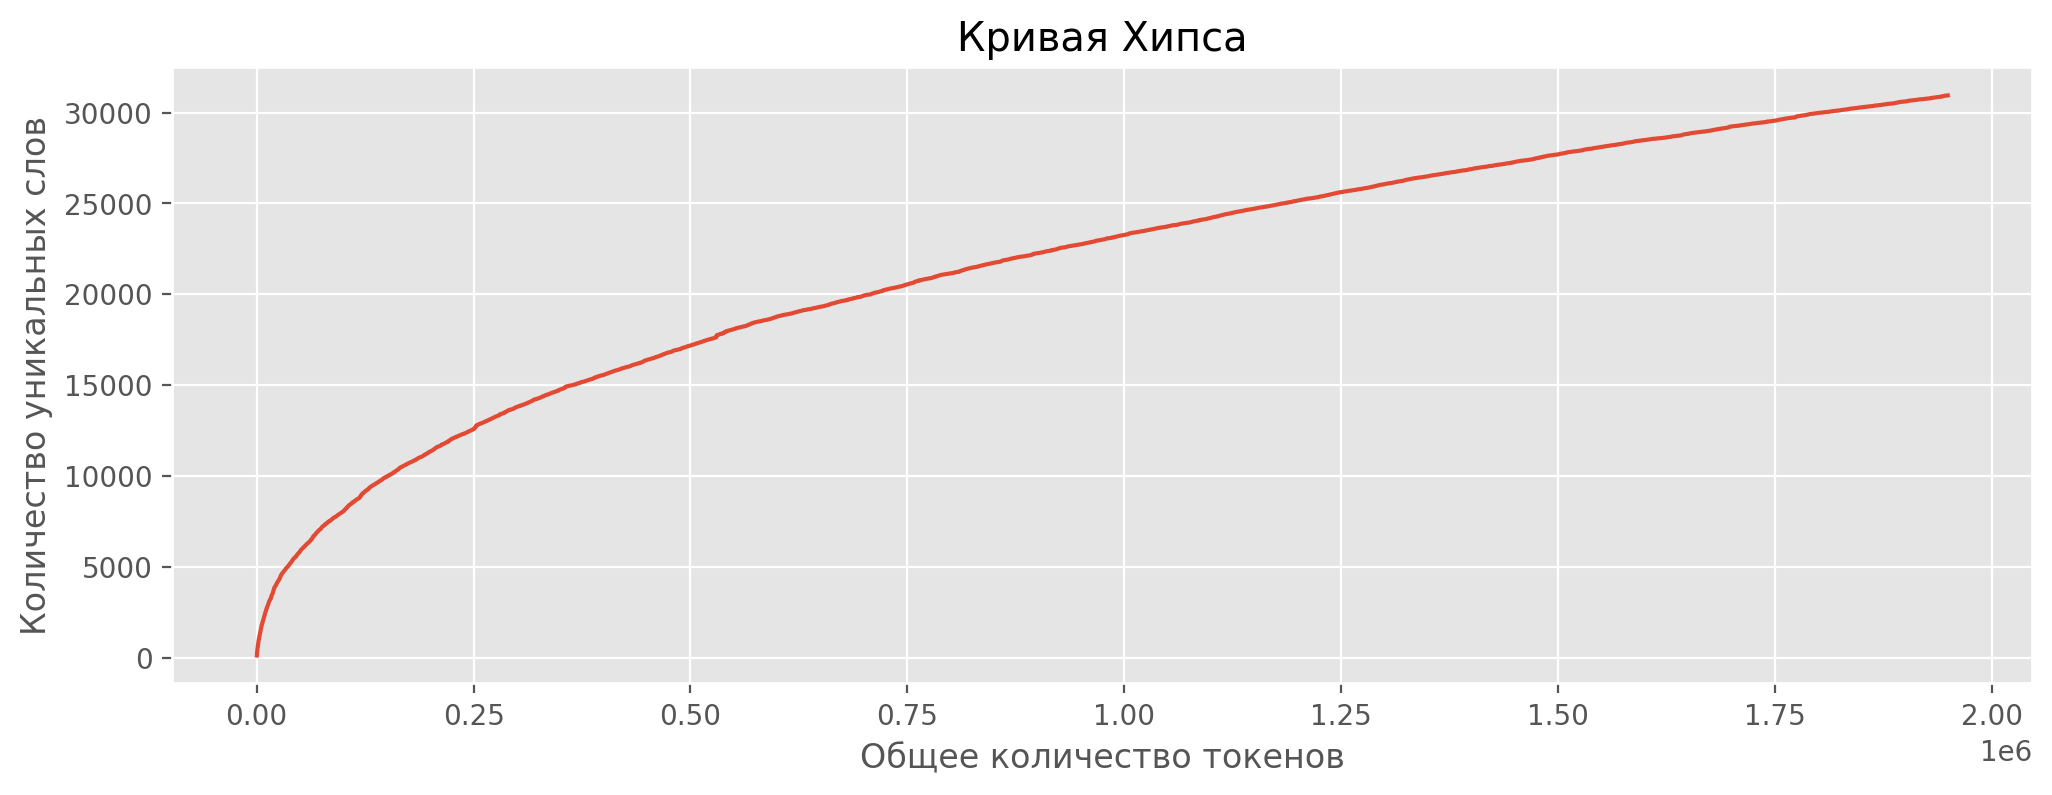

In [40]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(n_tokens, n_types)
plt.xlabel('–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–∫–µ–Ω–æ–≤')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤')
plt.title('–ö—Ä–∏–≤–∞—è –•–∏–ø—Å–∞')
plt.show()

### 5. –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç"? / —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?

In [54]:
from nltk import FreqDist
Freq_Dist = FreqDist(tokens_all)

In [57]:
print('–°–ª–æ–≤–æ "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -"',Freq_Dist['—Å–æ—Ç—Ä—É–¥–Ω–∏–∫'],'—Ä–∞–∑')
print('–°–ª–æ–≤–æ "–∫–ª–∏–µ–Ω—Ç" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -"',Freq_Dist['–∫–ª–∏–µ–Ω—Ç'],'—Ä–∞–∑')

–°–ª–æ–≤–æ "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -" 122619 —Ä–∞–∑
–°–ª–æ–≤–æ "–∫–ª–∏–µ–Ω—Ç" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -" 121659 —Ä–∞–∑


"–∫–ª–∏–µ–Ω—Ç" —á–∞—â–µ "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫"

In [58]:
print('–°–ª–æ–≤–æ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -"',Freq_Dist['–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ'],'—Ä–∞–∑')
print('–°–ª–æ–≤–æ "–¥–æ–≤–µ—Ä–∏–µ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -"',Freq_Dist['–¥–æ–≤–µ—Ä–∏–µ'],'—Ä–∞–∑')

–°–ª–æ–≤–æ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -" 3046 —Ä–∞–∑
–°–ª–æ–≤–æ "–¥–æ–≤–µ—Ä–∏–µ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è -" 1884 —Ä–∞–∑


"–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" —á–∞—â–µ "–¥–æ–≤–µ—Ä–∏–µ"

### 6. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ `ùë°ùëì‚àíùëñùëëùëì` , –¥–ª—è –ø–æ–∏—Å–∫–∞ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤–∞ –∏ –±–∞–≥—Ä–∞–º—ã (–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (1))

In [64]:
df['rating_grade'].value_counts()

1.0    39026
2.0    12995
5.0    10273
3.0     7362
4.0     3495
Name: rating_grade, dtype: int64

In [65]:
num=10000

df_sample = df[(df.rating_grade==1)].sample(n=num).copy()
df_sample = df_sample.append(df[(df.rating_grade==5)].sample(n=num))

df_sample.rating_grade.value_counts()

5.0    10000
1.0    10000
Name: rating_grade, dtype: int64

In [66]:
tokens_by_topic = []

for rating in df_sample.rating_grade.unique():
    tokens=[]
    sample=df_sample[df_sample['rating_grade']==rating]
    
    for i in range(len(sample)):
        tokens += sample.lemma.iloc[i].split()
        
    tokens_by_topic.append(tokens)

In [68]:
df_sample.head(3)

author     bank_license                  bank_name  \
119921  andrey_egorov  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3292             –†–∞–π—Ñ—Ñ–∞–π–∑–µ–Ω–±–∞–Ω–∫   
89328        *Galina*  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623                     –í–¢–ë 24   
48436    –ù–µ –∫–ª–∏–µ–Ω—Çkzn  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3279  –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ë–∞–Ω–∫ ¬´–¢—Ä–∞—Å—Ç¬ª   

                      city             datetime  num_comments  rating_grade  \
119921  –≥. –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥  2011-09-02 15:42:00             6           1.0   
89328       –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫  2013-03-04 09:21:00             1           1.0   
48436            –≥. –ö–∞–∑–∞–Ω—å  2014-05-05 19:21:00             2           1.0   

        rating_not_checked                                               text  \
119921               False  –ü—Ä–æ—à—É –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ...   
89328                False  –ü–æ–¥–∞–ª–∞ –∑–∞—è–≤–∫—É –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä...   
48436                False  –°–æ–≥–ª–∞—Å–Ω–∞ —Å–æ –≤—Å–µ–º–∏ —Ä–∞–Ω–Ω–µ–µ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏...   

                                            title   clean_city  \
119921  "–ú—ã –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–ª–∏, –Ω–æ –ø–æ—á–µ–º—É - –Ω–µ –∑–Ω–∞–µ–º!"    –ü–µ—Ç–µ—Ä–±—É—Ä–≥   
89328                 –û—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
48436                             –ó–≤–æ–Ω–∫–∏ –∏–∑ –±–∞–Ω–∫–∞       –ö–∞–∑–∞–Ω—å   

                                           text_tokinized  \
119921  –ø—Ä–æ—à—É –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ...   
89328   –ø–æ–¥–∞–ª–∞ –∑–∞—è–≤–∫—É –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä...   
48436   —Å–æ–≥–ª–∞—Å–Ω–∞ —Å–æ –≤—Å–µ–º–∏ —Ä–∞–Ω–Ω–µ–µ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏...   

                               text_tokinized_stop_worlds  \
119921  –ø—Ä–æ—à—É –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ...   
89328   –ø–æ–¥–∞–ª–∞ –∑–∞—è–≤–∫—É –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä–µ–¥–∏...   
48436   —Å–æ–≥–ª–∞—Å–Ω–∞ –≤—Å–µ–º–∏ —Ä–∞–Ω–Ω–µ–µ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏ –Ω–µ...   

                                                    lemma  \
119921  –ø—Ä–æ—Å–∏—Ç—å –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ...   
89328   –ø–æ–¥–∞–≤–∞—Ç—å –∑–∞—è–≤–∫–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏–π –∫—Ä–µ–¥...   
48436   —Å–æ–≥–ª–∞—Å–Ω—ã–π –≤—Å–µ —Ä–∞–Ω–Ω–∏–π –æ—Å—Ç–∞–≤–ª—è—Ç—å –æ—Ç–∑—ã–≤ –Ω–µ–∫–æ–º–ø–µ—Ç–µ...   

                                                    nouns  
119921  –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞—â–µ–Ω–∏–µ –æ–±—Ä–∞—â–µ–Ω–∏–µ –±–∞–Ω–∫ –∞–≤–≥—É—Å—Ç...  
89328   –∑–∞—è–≤–∫–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –º–æ—Å–∫–≤–∞ –∞–Ω–∫–µ—Ç–∞...  
48436   —Å–æ–≥–ª–∞—Å–Ω—ã–π –æ—Ç–∑—ã–≤ —Ä–∞–±–æ—Ç–∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ —Ü–µ–Ω—Ç—Ä –¥–∏—Ä–µ–∫—Ü–∏...

#### –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —É–Ω–∏–≥—Ä–∞–º–º

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_topic])
feature_names = tfidf.get_feature_names() 
tfidf_ranking_5 = []
tfidf_ranking_1 = []
dense = tfidf_matrix.todense()

text = dense[1].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []

for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:70]:
    tfidf_ranking_5.append(phrase)
    
text = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []

for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:70]:
    tfidf_ranking_1.append(phrase)

In [70]:
rank = pd.DataFrame({'tfidf_ranking_5': tfidf_ranking_5,'tfidf_ranking_1': tfidf_ranking_1})
rank.head(10)

tfidf_ranking_5 tfidf_ranking_1
0            –±–∞–Ω–∫            –±–∞–Ω–∫
1           –∫–∞—Ä—Ç–∞           –∫–∞—Ä—Ç–∞
2           –æ—á–µ–Ω—å          –¥–µ–Ω—å–≥–∏
3          –∫–ª–∏–µ–Ω—Ç            –¥–µ–Ω—å
4            –¥–µ–Ω—å             –º–æ–π
5       —Å–æ—Ç—Ä—É–¥–Ω–∏–∫       –æ—Ç–¥–µ–ª–µ–Ω–∏–µ
6          –∫—Ä–µ–¥–∏—Ç       —Å–æ—Ç—Ä—É–¥–Ω–∏–∫
7         –∫–æ—Ç–æ—Ä—ã–π         –∫–æ—Ç–æ—Ä—ã–π
8       –æ—Ç–¥–µ–ª–µ–Ω–∏–µ          –∫—Ä–µ–¥–∏—Ç
9           –≤–∫–ª–∞–¥            —Å—á–µ—Ç

–ò—Å–∫–ª—é—á–µ–Ω–∏–µ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–π

In [73]:
rank['tfidf_ranking_5_without_1']=rank.tfidf_ranking_5[~rank.tfidf_ranking_5.isin(rank.tfidf_ranking_1)]
rank['tfidf_ranking_1_without_5']=rank.tfidf_ranking_1[~rank.tfidf_ranking_1.isin(rank.tfidf_ranking_5)]

In [78]:
rank.iloc[:,-2:].dropna()

tfidf_ranking_5_without_1 tfidf_ranking_1_without_5
20              –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ                     –æ—Ç–≤–µ—Ç
30                    –±—ã—Å—Ç—Ä–æ                     –Ω–æ–º–µ—Ä
32                  –∏–Ω—Ç–µ—Ä–Ω–µ—Ç                  –Ω–∞–ø–∏—Å–∞—Ç—å
36                     –±–∞–Ω–∫–∞                       –≤–∞—à
38                   –æ—á–µ—Ä–µ–¥—å                  —Å—Ä–µ–¥—Å—Ç–≤–æ
39                 –æ—Ç–∫—Ä—ã–≤–∞—Ç—å                  –æ—Ç–≤–µ—á–∞—Ç—å
45                   —Ö–æ—Ä–æ—à–∏–π                    –∑–≤–æ–Ω–æ–∫
59                     —Å–∞–º—ã–π                  –æ–ø–µ—Ä–∞—Ü–∏—è
63                  –ø–æ–º–æ–≥–∞—Ç—å                    –¥–∞–≤–∞—Ç—å
67                        –≤—Å                     –∑–Ω–∞—Ç—å
69                   –¥–µ–≤—É—à–∫–∞                      –±—ã—Ç—å

#### –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –±–∏–≥—Ä–∞–º–º

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(2,2), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_topic])
feature_names = tfidf.get_feature_names() 
tfidf_ranking_rank_is_5 = []
tfidf_ranking_rank_is_1 = []
dense = tfidf_matrix.todense()

text = dense[1].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []

for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:70]:
    tfidf_ranking_rank_is_5.append(phrase)
    
text = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []

for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:70]:
    tfidf_ranking_rank_is_1.append(phrase) 

In [81]:
rankings = pd.DataFrame({'tfidf_ranking_rank_is_5': tfidf_ranking_rank_is_5,'tfidf_ranking_rank_is_1': tfidf_ranking_rank_is_1})
rankings.head(10)

tfidf_ranking_rank_is_5 tfidf_ranking_rank_is_1
0           –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –±–∞–Ω–∫          —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫
1             –¥—Ä—É–≥–æ–π –±–∞–Ω–∫       –¥–µ–Ω–µ–∂–Ω—ã–π —Å—Ä–µ–¥—Å—Ç–≤–æ
2          —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫          –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫
3         –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –∫–∞—Ä—Ç–∞         –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –∫–∞—Ä—Ç–∞
4             –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫      –Ω–∞–ø–∏—Å–∞—Ç—å –∑–∞—è–≤–ª–µ–Ω–∏–µ
5         –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –≤–∫–ª–∞–¥           –≥–æ—Ä—è—á–∏–π –ª–∏–Ω–∏—è
6          –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫              –∫–æ–ª–ª —Ü–µ–Ω—Ç—Ä
7         —è–≤–ª—è—Ç—å—Å—è –∫–ª–∏–µ–Ω—Ç            —Ä–∞–±–æ—á–∏–π –¥–µ–Ω—å
8          —Å–ª–µ–¥—É—é—â–∏–π –¥–µ–Ω—å           –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –±–∞–Ω–∫
9             –¥–æ–±—Ä—ã–π –¥–µ–Ω—å        —Å–ª—É–∂–±–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∞

In [82]:
rankings['tfidf_ranking_rank_is_5_without_1']=rankings.tfidf_ranking_rank_is_5[~rankings.tfidf_ranking_rank_is_5.isin(rankings.tfidf_ranking_rank_is_1)]
rankings['tfidf_ranking_rank_is_1_without_5']=rankings.tfidf_ranking_rank_is_1[~rankings.tfidf_ranking_rank_is_1.isin(rankings.tfidf_ranking_rank_is_5)]

In [83]:
rankings.iloc[:,-2:].dropna()

tfidf_ranking_rank_is_5_without_1 tfidf_ranking_rank_is_1_without_5
13            –≤—ã—Ä–∞–∂–∞—Ç—å –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å                          —Å–µ–π –ø–æ—Ä–∞
19                  –ø—Ä–∏—è—Ç–Ω–æ —É–¥–∏–≤–ª—è—Ç—å                    –ø–æ–ª—É—á–∞—Ç—å –æ—Ç–≤–µ—Ç
22                        –±–∞–Ω–∫ –æ—á–µ–Ω—å                  –ø–∏—Å–∞—Ç—å –∑–∞—è–≤–ª–µ–Ω–∏–µ
24                         –≥–æ–¥ –Ω–∞–∑–∞–¥                      —Ç–µ—á–µ–Ω–∏–µ –¥–µ–Ω—å
25                   –æ—á–µ–Ω—å –¥–æ–≤–æ–ª—å–Ω—ã–π                     –Ω–æ–º–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω
26                        –º–æ–π –≤–æ–ø—Ä–æ—Å              –æ–±—Ä–∞—â–∞—Ç—å—Å—è –æ—Ç–¥–µ–ª–µ–Ω–∏–µ
30                   –±–æ–ª—å—à–æ–π —Å–ø–∞—Å–∏–±–æ                     –º–æ–π –∑–∞—è–≤–ª–µ–Ω–∏–µ
34                  –æ–≥—Ä–æ–º–Ω—ã–π —Å–ø–∞—Å–∏–±–æ                        –º–æ–π –¥–µ–Ω—å–≥–∏
36                       —É—Å–ª—É–≥–∞ –±–∞–Ω–∫                    —Å–Ω–∏–º–∞—Ç—å –¥–µ–Ω—å–≥–∏
37                       –±–∞–Ω–∫ –º–æ—Å–∫–≤–∞                  –ø–æ–≥–∞—à–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç
39             –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ                       —Å–≤–æ–π –¥–µ–Ω—å–≥–∏
42                     –æ—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω–æ                      –¥–µ–Ω—å–≥–∏ –∫–∞—Ä—Ç–∞
45                          –±–∞–Ω–∫ –≥–æ–¥                            —Å—á —Ç–æ—Ç
47                    –æ—Ç–∫—Ä—ã—Ç–∏–µ –≤–∫–ª–∞–¥                     –≤–æ–ø—Ä–æ—Å –ø–æ—á–µ–º—É
49                        –∫–∞—Ä—Ç–∞ –±–∞–Ω–∫                –µ–∂–µ–º–µ—Å—è—á–Ω—ã–π –ø–ª–∞—Ç–µ–∂
50                      –º–æ—á—å —Å–∫–∞–∑–∞—Ç—å               –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –æ—Ç–¥–µ–ª–µ–Ω–∏–µ
51                     –æ—á–µ–Ω—å —É–¥–æ–±–Ω—ã–π                     –∫–∞—Ä—Ç–∞ –∫–æ—Ç–æ—Ä—ã–π
52                      –ø—Ä–æ–¥—É–∫—Ç –±–∞–Ω–∫                    –º–æ–±–∏–ª—å–Ω—ã–π –±–∞–Ω–∫
54                    —Ö–æ—Ç–µ—Ç—å —Å–∫–∞–∑–∞—Ç—å                   –¥–∞–Ω–Ω—ã–π —Å–∏—Ç—É–∞—Ü–∏—è
57              —Ö–æ—Ç–µ—Ç—å –ø–æ–±–ª–∞–≥–æ–¥–∞—Ä–∏—Ç—å                      –∑–≤–æ–Ω–∏—Ç—å –±–∞–Ω–∫
62                        –∫–∞–∫–æ–π –ª–∏–±–æ                   —Å–±–µ—Ä–±–∞–Ω–∫ —Ä–æ—Å—Å–∏—è
63                   –ø–æ–¥–∞–≤–∞—Ç—å –∑–∞—è–≤–∫–∞                –∑–∞—è–≤–ª–µ–Ω–∏–µ –∑–∞–∫—Ä—ã—Ç–∏–µ
64         –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ                      –≤–∑—è—Ç—å –∫—Ä–µ–¥–∏—Ç
65                  –∏–ø–æ—Ç–µ—á–Ω—ã–π –∫—Ä–µ–¥–∏—Ç                      –±–∞–Ω–∫ —Å–∫–∞–∑–∞—Ç—å
66                    –æ—Ç–∫—Ä—ã–≤–∞—Ç—å —Å—á–µ—Ç                –Ω–∞–ø–∏—Å–∞—Ç—å –ø—Ä–µ—Ç–µ–Ω–∑–∏—è
67                       —Ö–æ—É–º –∫—Ä–µ–¥–∏—Ç                           –ø–∏–Ω –∫–æ–¥
68                 –æ—á–µ–Ω—å –ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è                   –º–æ–ª–æ–¥–æ–π —á–µ–ª–æ–≤–µ–∫

## –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

In [86]:
import gensim.corpora as corpora
from gensim.models import ldamodel

In [87]:
texts = [df['lemma'].iloc[i].split() for i in range(len(df))]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [88]:
import random
random.seed(11)

In [89]:
lda = ldamodel.LdaModel(corpus=corpus, 
                        id2word=dictionary, 
                        num_topics=20, 
                        alpha='auto', 
                        eta='auto', 
                        iterations = 20, 
                        passes = 5)

In [90]:
# 20 —Ç–µ–º, —Ä–∞–Ω–¥–æ–º–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ 5
lda.show_topics(5)

[(15,
  '0.067*"—Ä—É–±–ª—å" + 0.052*"–∫—É—Ä—Å" + 0.046*"–¥–æ–ª–ª–∞—Ä" + 0.045*"–≤–∞–ª—é—Ç–∞" + 0.045*"–µ–≤—Ä–æ" + 0.038*"–∫–æ–º–∏—Å—Å–∏—è" + 0.037*"—Å—É–º–º–∞" + 0.032*"–∫–∞—Å—Å–∏—Ä" + 0.020*"–≤–∞–ª—é—Ç–Ω—ã–π" + 0.019*"–∫–∞—Å—Å–∞"'),
 (5,
  '0.048*"–ª–∏–º–∏—Ç" + 0.030*"—Å–≤—è–∑–Ω–æ–π" + 0.030*"–ø–æ–∫—É–ø–∫–∞" + 0.025*"–º–∞–≥–∞–∑–∏–Ω" + 0.023*"–∞–∫—Ü–∏—è" + 0.022*"–ø–µ—Ä–∏–æ–¥" + 0.022*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.021*"—Ç–∫—Å" + 0.017*"–∫–∞—Ä—Ç–∞" + 0.017*"–±–∞–ª–ª"'),
 (2,
  '0.042*"–¥–µ–Ω—å" + 0.031*"–±–∞–Ω–∫" + 0.027*"–ø–æ–∑–≤–æ–Ω–∏—Ç—å" + 0.021*"–∑–≤–æ–Ω–∏—Ç—å" + 0.018*"—Å–∫–∞–∑–∞—Ç—å" + 0.015*"—Ç–µ–ª–µ—Ñ–æ–Ω" + 0.014*"—Ü–µ–Ω—Ç—Ä" + 0.014*"–∑–∞—è–≤–∫–∞" + 0.013*"–∑–≤–æ–Ω–æ–∫" + 0.013*"–≤–æ–ø—Ä–æ—Å"'),
 (19,
  '0.016*"—Å–∫–∞–∑–∞—Ç—å" + 0.015*"–≥–æ–≤–æ—Ä–∏—Ç—å" + 0.015*"–¥–µ–≤—É—à–∫–∞" + 0.012*"–ø—Ä–∏—Ö–æ–¥–∏—Ç—å" + 0.012*"–¥–µ–Ω—å–≥–∏" + 0.011*"–≤—Å" + 0.009*"–∑–Ω–∞—Ç—å" + 0.009*"—Å–ø—Ä–∞—à–∏–≤–∞—Ç—å" + 0.008*"–¥—É–º–∞—Ç—å" + 0.008*"–¥–∞–≤–∞—Ç—å"'),
 (13,
  '0.060*"–±–∞–Ω–∫" + 0.022*"–∫–

1. –û–±–º–µ–Ω
2. –ü–æ–∫—É–ø–∫–∞ –ø–æ –∞–∫—Ü–∏–∏, —á—Ç–æ-—Ç–æ —Å–≤—è–∑–∞–Ω–Ω–æ–µ c –∫–∞—Ä—Ç–∞–º–∏
3. –ó–∞—è–≤–∫–∞ –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É
4. –ö–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–∏
5. –ü—Ä–æ–±–ª–µ–º–∞ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞

In [91]:
lda15 = ldamodel.LdaModel(corpus=corpus, 
                          id2word=dictionary, 
                          num_topics=15, 
                          alpha='auto', 
                          eta='auto', 
                          iterations = 20, 
                          passes = 5)

In [92]:
# 25 —Ç–µ–º, —Ä–∞–Ω–¥–æ–º–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ 5
lda15.show_topics(5)

[(8,
  '0.131*"–≤–∫–ª–∞–¥" + 0.039*"–æ—Ç–∫—Ä—ã–≤–∞—Ç—å" + 0.037*"–±–∞–Ω–∫" + 0.027*"–¥–µ–ø–æ–∑–∏—Ç" + 0.026*"–ø—Ä–æ—Ü–µ–Ω—Ç" + 0.020*"–¥–µ–Ω—å–≥–∏" + 0.020*"–¥–æ–≥–æ–≤–æ—Ä" + 0.017*"–æ—Ñ–∏—Å" + 0.014*"—Å—É–º–º–∞" + 0.014*"—Å—Ç–∞–≤–∫–∞"'),
 (9,
  '0.078*"–∫—Ä–µ–¥–∏—Ç" + 0.023*"–±–∞–Ω–∫" + 0.017*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.017*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.015*"–¥–æ–≥–æ–≤–æ—Ä" + 0.015*"–æ—Ñ–æ—Ä–º–ª—è—Ç—å" + 0.015*"–∑–∞—è–≤–∫–∞" + 0.014*"—Å—Ç—Ä–∞—Ö–æ–≤–∫–∞" + 0.011*"–∫–≤–∞—Ä—Ç–∏—Ä–∞" + 0.011*"—Å—É–º–º–∞"'),
 (12,
  '0.019*"–æ—Ç–¥–µ–ª–µ–Ω–∏–µ" + 0.016*"–æ—á–µ—Ä–µ–¥—å" + 0.013*"—Ä–∞–±–æ—Ç–∞—Ç—å" + 0.012*"–º–∏–Ω—É—Ç–∞" + 0.010*"—á–µ–ª–æ–≤–µ–∫" + 0.010*"–¥–µ–≤—É—à–∫–∞" + 0.009*"–æ—Ñ–∏—Å" + 0.008*"–∫–∞—Å—Å–∞" + 0.008*"—á–∞—Å" + 0.008*"–∫–ª–∏–µ–Ω—Ç"'),
 (4,
  '0.030*"–¥–µ–Ω—å" + 0.029*"–±–∞–Ω–∫" + 0.020*"—Å–∫–∞–∑–∞—Ç—å" + 0.019*"–ø–æ–∑–≤–æ–Ω–∏—Ç—å" + 0.015*"–∑–≤–æ–Ω–∏—Ç—å" + 0.014*"–æ—Ç–≤–µ—Ç" + 0.013*"–≤–æ–ø—Ä–æ—Å" + 0.012*"–æ—Ç–¥–µ–ª–µ–Ω–∏–µ" + 0.011*"–æ—Ç–≤–µ—á–∞—Ç—å" + 0.010*"—Ç–µ–ª–µ—Ñ–æ–Ω"'),
 (10,

1. –û—Ç–∫—Ä—ã—Ç–∏–µ –¥–µ–ø–æ–∑–∏—Ç–∞
2. –ö—Ä–µ–¥–∏—Ç, —Å—Ç—Ä–∞—Ö–æ–≤–∫–∞, –∫–≤–∞—Ä—Ç–∏—Ä–∞
3. –û—á–µ—Ä–µ–¥—å
4. –ó–≤–æ–Ω–æ–∫
5. –í–æ–ø—Ä–æ—Å –∫–ª–∏–µ–Ω—Ç–∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫—É

In [93]:
lda10 = ldamodel.LdaModel(corpus=corpus, 
                          id2word=dictionary, 
                          num_topics=10, 
                          alpha='auto', 
                          eta='auto', 
                          iterations = 20, 
                          passes = 5)

In [100]:
# 10 —Ç–µ–º
lda10.show_topics(5)

[(5,
  '0.051*"–∫—Ä–µ–¥–∏—Ç" + 0.031*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.027*"–±–∞–Ω–∫" + 0.023*"–∑–∞—è–≤–∫–∞" + 0.016*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.013*"–æ—Ñ–æ—Ä–º–ª—è—Ç—å" + 0.012*"—Å–ø—Ä–∞–≤–∫–∞" + 0.012*"–¥–æ–≥–æ–≤–æ—Ä" + 0.010*"—Å—Ç—Ä–∞—Ö–æ–≤–∫–∞" + 0.010*"–º–µ–Ω–µ–¥–∂–µ—Ä"'),
 (0,
  '0.049*"–≤–∫–ª–∞–¥" + 0.043*"–±–∞–Ω–∫" + 0.026*"–¥–æ–≥–æ–≤–æ—Ä" + 0.021*"—Å—á–µ—Ç" + 0.015*"–æ—Ç–∫—Ä—ã–≤–∞—Ç—å" + 0.011*"—É—Å–ª–æ–≤–∏–µ" + 0.010*"–ø—Ä–æ—Ü–µ–Ω—Ç" + 0.009*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.009*"–∫–ª–∏–µ–Ω—Ç" + 0.008*"–æ—Ç–∫—Ä—ã—Ç–∏–µ"'),
 (2,
  '0.034*"–¥–µ–Ω—å–≥–∏" + 0.030*"–∑–∞—è–≤–ª–µ–Ω–∏–µ" + 0.030*"–±–∞–Ω–∫–æ–º–∞—Ç" + 0.023*"—Å–±–µ—Ä–±–∞–Ω–∫" + 0.021*"–º–æ–π" + 0.018*"–±–∞–Ω–∫" + 0.018*"–¥–µ–Ω—å" + 0.016*"–∫–∞—Ä—Ç–∞" + 0.016*"–ø—Ä–µ—Ç–µ–Ω–∑–∏—è" + 0.015*"–æ—Ç–¥–µ–ª–µ–Ω–∏–µ"'),
 (4,
  '0.048*"–±–∞–Ω–∫" + 0.019*"–∫–ª–∏–µ–Ω—Ç" + 0.014*"–æ—á–µ–Ω—å" + 0.009*"–∫–æ—Ç–æ—Ä—ã–π" + 0.009*"—Å–≤–æ–π" + 0.008*"—Ä–∞–±–æ—Ç–∞" + 0.008*"–≥–æ–¥" + 0.007*"–≤—Ä–µ–º—è" + 0.007*"–≤–æ–ø—Ä–æ—Å" + 0.007*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫"'),
 (6,
  '

1. –ó–∞—è–≤–∫–∞ –Ω–∞ –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –¥–æ–≥–æ–≤–æ
2. –û—Ç–∫—Ä—ã—Ç–∏–µ –≤–∫–ª–∞–¥–∞
3. –ü—Ä–µ—Ç–µ–Ω–∑–∏—è –∫–ª–∏–µ–Ω—Ç–∞ –±–∞–Ω–∫—É —Å–±–µ—Ä–±–∞–Ω–∫–∞
4. –í–æ–ø—Ä–æ—Å –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É –±–∞–Ω–∫–∞
5. –ó–≤–æ–Ω–æ–∫ –∫–ª–∏–µ–Ω—Ç–∞ –≤ –±–∞–Ω–∫

## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤

In [2]:
# df_sample.to_csv('sample.csv', index=False)
# df_sample1 = pd.read_csv('/Users/aleksandr/Downloads/nlp-netology-master/sample.csv')
# df_sample1.head(3)
df_sample.head(3)

author     bank_license                  bank_name  \
0  andrey_egorov  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3292             –†–∞–π—Ñ—Ñ–∞–π–∑–µ–Ω–±–∞–Ω–∫   
1       *Galina*  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623                     –í–¢–ë 24   
2   –ù–µ –∫–ª–∏–µ–Ω—Çkzn  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3279  –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ë–∞–Ω–∫ ¬´–¢—Ä–∞—Å—Ç¬ª   

                 city             datetime  num_comments  rating_grade  \
0  –≥. –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥  2011-09-02 15:42:00             6           1.0   
1      –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫  2013-03-04 09:21:00             1           1.0   
2           –≥. –ö–∞–∑–∞–Ω—å  2014-05-05 19:21:00             2           1.0   

   rating_not_checked                                               text  \
0               False  –ü—Ä–æ—à—É –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ...   
1               False  –ü–æ–¥–∞–ª–∞ –∑–∞—è–≤–∫—É –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä...   
2               False  –°–æ–≥–ª–∞—Å–Ω–∞ —Å–æ –≤—Å–µ–º–∏ —Ä–∞–Ω–Ω–µ–µ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏...   

                                       title   clean_city  \
0  "–ú—ã –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–ª–∏, –Ω–æ –ø–æ—á–µ–º—É - –Ω–µ –∑–Ω–∞–µ–º!"    –ü–µ—Ç–µ—Ä–±—É—Ä–≥   
1                –û—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ  –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2                            –ó–≤–æ–Ω–∫–∏ –∏–∑ –±–∞–Ω–∫–∞       –ö–∞–∑–∞–Ω—å   

                                      text_tokinized  \
0  –ø—Ä–æ—à—É –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ...   
1  –ø–æ–¥–∞–ª–∞ –∑–∞—è–≤–∫—É –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä...   
2  —Å–æ–≥–ª–∞—Å–Ω–∞ —Å–æ –≤—Å–µ–º–∏ —Ä–∞–Ω–Ω–µ–µ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏...   

                          text_tokinized_stop_worlds  \
0  –ø—Ä–æ—à—É –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –æ...   
1  –ø–æ–¥–∞–ª–∞ –∑–∞—è–≤–∫—É –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä–µ–¥–∏...   
2  —Å–æ–≥–ª–∞—Å–Ω–∞ –≤—Å–µ–º–∏ —Ä–∞–Ω–Ω–µ–µ –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏ –Ω–µ...   

                                               lemma  \
0  –ø—Ä–æ—Å–∏—Ç—å –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ...   
1  –ø–æ–¥–∞–≤–∞—Ç—å –∑–∞—è–≤–∫–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏–π –∫—Ä–µ–¥...   
2  —Å–æ–≥–ª–∞—Å–Ω—ã–π –≤—Å–µ —Ä–∞–Ω–Ω–∏–π –æ—Å—Ç–∞–≤–ª—è—Ç—å –æ—Ç–∑—ã–≤ –Ω–µ–∫–æ–º–ø–µ—Ç–µ...   

                                               nouns  
0  –æ—Ç–¥–µ–ª –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞—â–µ–Ω–∏–µ –æ–±—Ä–∞—â–µ–Ω–∏–µ –±–∞–Ω–∫ –∞–≤–≥—É—Å—Ç...  
1  –∑–∞—è–≤–∫–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –º–æ—Å–∫–≤–∞ –∞–Ω–∫–µ—Ç–∞...  
2  —Å–æ–≥–ª–∞—Å–Ω—ã–π –æ—Ç–∑—ã–≤ —Ä–∞–±–æ—Ç–∞ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ —Ü–µ–Ω—Ç—Ä –¥–∏—Ä–µ–∫—Ü–∏...

In [3]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
author                        20000 non-null object
bank_license                  20000 non-null object
bank_name                     20000 non-null object
city                          20000 non-null object
datetime                      20000 non-null object
num_comments                  20000 non-null int64
rating_grade                  20000 non-null float64
rating_not_checked            20000 non-null bool
text                          20000 non-null object
title                         19854 non-null object
clean_city                    20000 non-null object
text_tokinized                20000 non-null object
text_tokinized_stop_worlds    20000 non-null object
lemma                         20000 non-null object
nouns                         20000 non-null object
dtypes: bool(1), float64(1), int64(1), object(12)
memory usage: 2.2+ MB


In [4]:
df_sample.rating_grade.value_counts()

5.0    10000
1.0    10000
Name: rating_grade, dtype: int64

In [5]:
df_sample.columns

Index(['author', 'bank_license', 'bank_name', 'city', 'datetime',
       'num_comments', 'rating_grade', 'rating_not_checked', 'text', 'title',
       'clean_city', 'text_tokinized', 'text_tokinized_stop_worlds', 'lemma',
       'nouns'],
      dtype='object')

In [99]:
X = df_sample['lemma'].values
y = df_sample.rating_grade.values

In [100]:
X.shape, y.shape

((20000,), (20000,))

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000,), (6000,), (14000,), (6000,))

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

#### –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ª—é–±–æ–π –∏–∑–≤–µ—Å—Ç–Ω—ã–π –≤–∞–º –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∏ –ø–æ–ª—É—á–∏—Ç–µ baseline. –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞: –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ —É–Ω–∏–≥—Ä–∞–º, –ø–∞—Ä –∏–ª–∏ —Ç—Ä–æ–µ–∫ —Å–ª–æ–≤ –∏–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–∏–º–≤–æ–ª—å–Ω—ã—Ö  ùëõ -–≥—Ä–∞–º.

In [1]:
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier

# !!! –ù–∞ –∫–∞–∂–¥–æ–º —ç—Ç–∞–ø–µ Pipeline –Ω—É–∂–Ω–æ —É–∫–∞–∑–∞—Ç—å —Å–≤–æ–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
# 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç: tf-idf + LSI
# 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç: LDA

# clf = Pipeline([
#     ('vect', CountVectorizer(analyzer = 'char', ngram_range={4,6})),
#     ('clf', RandomForestClassifier()),
# ])

# clf = Pipeline([ 
#     ('vect', CountVectorizer()), 
#     ('tfidf', TfidfTransformer()), 
#     ('tm', TruncatedSVD()), 
#     ('clf', RandomForestClassifier())
# ])

In [103]:
clf_countvectorized = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', LogisticRegression())]
)

params_cntv = {
    'vect__analyzer': ['word','char'],
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (2, 2), (3, 3)),
    'clf__C': np.logspace(-3,3,7),
    'clf__penalty': ['l1','l2']  
}

scores=['accuracy', 'f1']

In [106]:
grid_cntv = GridSearchCV(
    clf_countvectorized, 
    param_grid=params_cntv, 
    cv=3,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, 
    verbose=1
)

In [107]:
grid_cntv.fit(X_train, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 756 out of 756 | elapsed: 66.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [115]:
# print(grid_cntv.best_estimator_)
print("Best score: %0.3f" % grid_cntv.best_score_)

Best score: 0.950


In [110]:
predictions=grid_cntv.best_estimator_.predict(X_test)

In [160]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.95
Recall:      0.95
F1_score:    0.95
Accuracy:    0.95


In [112]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95      2946
         5.0       0.96      0.94      0.95      3054

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



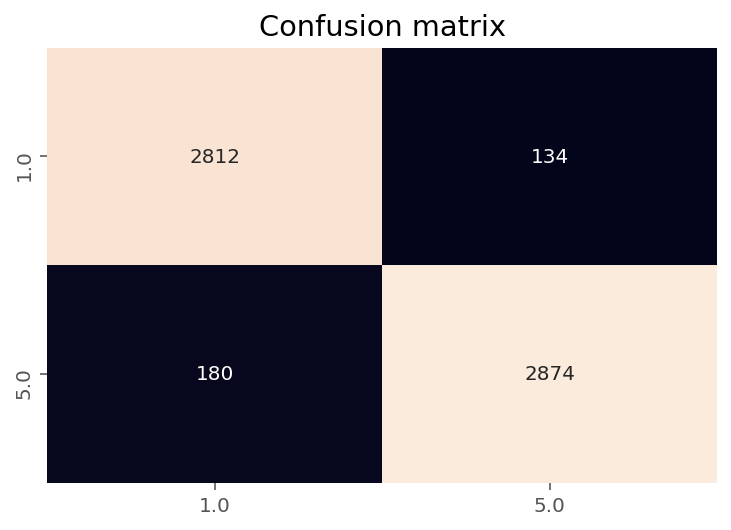

In [113]:
labels = grid_cntv.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, predictions), 
    annot=True, 
    fmt="d", 
    cbar=False, 
    xticklabels=labels, 
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

#### –°—Ä–∞–≤–Ω–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Å–∫—Ä—ã—Ç—ã—Ö —Ç–µ–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
- 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç:  ùë°ùëì‚àíùëñùëëùëì  –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ (sklearn.feature_extraction.text.TfidfTransformer) –∏ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ (–æ–Ω–æ –∂–µ ‚Äì –ª–∞—Ç–µ–Ω—Ç—ã–π —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑) (sklearn.decomposition.TruncatedSVD),
- 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç: —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –º–æ–¥–µ–ª–∏ LDA (sklearn.decomposition.LatentDirichletAllocation).

–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ accuracy –∏ F-measure –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. (–≠—Ç–∞ —á–∞—Å—Ç—å –∑–∞–¥–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º sklearn).

#### 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç

ùë°ùëì‚àíùëñùëëùëì

In [117]:
clf_tf_idf = Pipeline(
    [('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', LogisticRegression())]
)

params_tf_idf={
    'vect__analyzer': ['word'],
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
    'tfidf__use_idf': (True, False),
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l1', 'l2']
}

scores=['accuracy','f1']

In [118]:
grid_tf_idf = GridSearchCV(
    clf_tf_idf, 
    param_grid=params_tf_idf, 
    cv=3,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, 
    verbose=1
)

In [119]:
grid_tf_idf.fit(X_train, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 756 out of 756 | elapsed: 42.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [156]:
# print(grid_tf_idf.best_estimator_)
print("Best score: %0.3f" % grid_tf_idf.best_score_)

Best score: 0.953


In [158]:
predictions=grid_tf_idf.best_estimator_.predict(X_test)

In [159]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.95
Recall:      0.95
F1_score:    0.95
Accuracy:    0.95


In [123]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95      2946
         5.0       0.97      0.94      0.95      3054

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



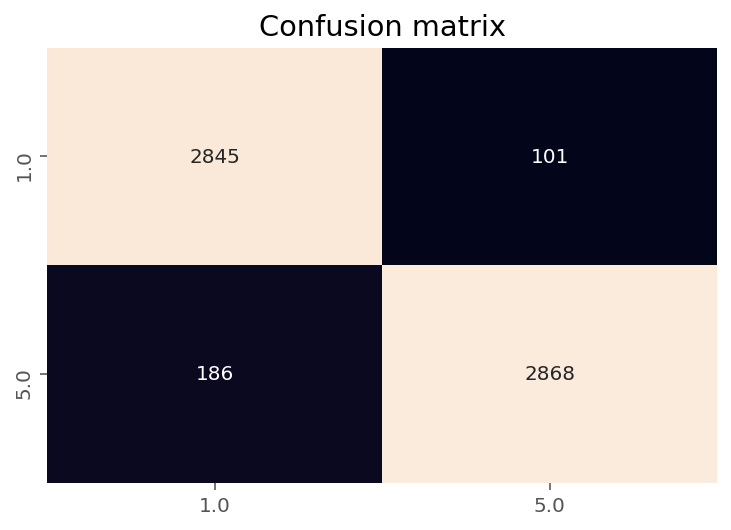

In [124]:
labels = grid_tf_idf.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, predictions), 
    annot=True, 
    fmt="d", 
    cbar=False, 
    xticklabels=labels, 
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

C–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ

In [125]:
clf_tf_idf_TruncatedSVD = Pipeline(
    [('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('tsvd', TruncatedSVD()),
     ('clf', LogisticRegression())]
)

params_tf_idf_TruncatedSVD={
    'vect__analyzer': ['word'],
    'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
    'tsvd__n_components': [5, 10, 25, 50, 100],
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l1', 'l2']
}

scores=['accuracy','f1']

In [126]:
grid_tf_idf_TruncatedSVD = GridSearchCV(
    clf_tf_idf_TruncatedSVD, 
    param_grid=params_tf_idf_TruncatedSVD, 
    cv=3,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, 
    verbose=1
)

In [127]:
grid_tf_idf_TruncatedSVD.fit(X_train, y_train)

Fitting 3 folds for each of 210 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 85.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 139.3min
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed: 183.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [161]:
# print(grid_tf_idf_TruncatedSVD.best_estimator_)
print("Best score: %0.3f" % grid_tf_idf_TruncatedSVD.best_score_)

Best score: 0.942


In [162]:
predictions=grid_tf_idf_TruncatedSVD.best_estimator_.predict(X_test)

In [163]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.94
Recall:      0.94
F1_score:    0.94
Accuracy:    0.94


In [131]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94      2946
         5.0       0.95      0.93      0.94      3054

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



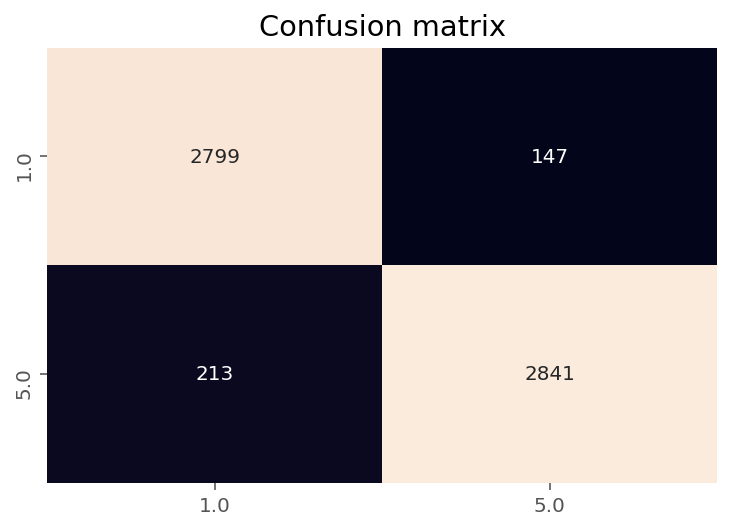

In [132]:
labels = grid_tf_idf_TruncatedSVD.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, predictions), 
    annot=True, 
    fmt="d", 
    cbar=False, 
    xticklabels=labels, 
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

#### 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç

LDA

In [136]:
clf_tf_idf_LDA = Pipeline(
    [('vect', CountVectorizer()),
     ('lda', LatentDirichletAllocation()),
     ('clf', LogisticRegression())]
)

params_tf_idf_LDA={
    'vect__analyzer': ['word'],
    'vect__max_df': [0.75],
    'vect__ngram_range': [(1, 1)],
    'lda__n_components' : [25, 50, 100],
    'clf__C': np.logspace(-3, 3, 7),
    'clf__penalty': ['l1']
}

scores=['accuracy', 'f1']

In [138]:
grid_tf_idf_LDA = GridSearchCV(
    clf_tf_idf_LDA, 
    param_grid=params_tf_idf_LDA, 
    cv=3,
    scoring=scores,
    refit=scores[0],
    n_jobs=-1, 
    verbose=1
)

In [139]:
grid_tf_idf_LDA.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed: 55.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [140]:
# print(grid_tf_idf_LDA.best_estimator_)
print("Best score: %0.3f" % grid_tf_idf_LDA.best_score_)

Best score: 0.912


In [164]:
predictions=grid_tf_idf_LDA.best_estimator_.predict(X_test)

In [165]:
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall:    {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1_score:  {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy:  {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.92
Recall:      0.92
F1_score:    0.92
Accuracy:    0.92


In [143]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.90      0.93      0.91      2946
         5.0       0.93      0.90      0.92      3054

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



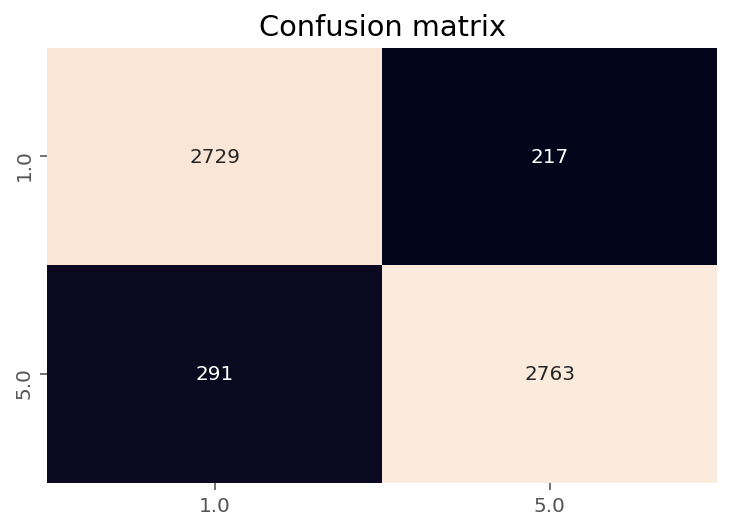

In [144]:
labels = grid_tf_idf_LDA.best_estimator_.classes_

sns.heatmap(
    data=confusion_matrix(y_test, predictions), 
    annot=True, 
    fmt="d", 
    cbar=False,
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Confusion matrix")
plt.show()

### –ò—Ç–æ–≥–æ:

In [151]:
models=['grid_cntv', 'grid_tf_idf', 'grid_tf_idf_TruncatedSVD', 'grid_tf_idf_LDA']

for model in models:
    print(model[5:])
    predictions=eval(model).best_estimator_.predict(X_test)
    print("f1_score: {0:6.3f}\nAccuracy: {0:6.3f}\n\n".format(
        f1_score(y_test, predictions, average='macro'), 
        accuracy_score(y_test, predictions)))

cntv
f1_score:  0.948
Accuracy:  0.948


tf_idf
f1_score:  0.952
Accuracy:  0.952


tf_idf_TruncatedSVD
f1_score:  0.940
Accuracy:  0.940


tf_idf_LDA
f1_score:  0.915
Accuracy:  0.915




**ùë°ùëì‚àíùëñùëëùëì –Ω–∞–∏–±–æ–ª–µ–µ —É–¥–∞—á–Ω–∞—è –º–æ–¥–µ–ª—å**

# –í—ã–≤–æ–¥ –¥–∞—Ç–∞—Å–µ—Ç –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–π –∏ —Ç—Ä–µ–±—É–µ—Ç –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞ —Ä–∞—Å—á–µ—Ç—ã

1. –ì—Ä–∞–º–æ—Ç–Ω–æ–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–π —Ä–∞–±–æ—Ç—ã —Å —Ç–µ–∫—Å—Ç–æ–º –∏ –ø–æ–Ω–∏–º–∞–Ω–∏–µ —Å—É—Ç–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ–º–æ–≥–∞–µ—Ç –µ–≥–æ –∞–Ω–∞–ª–∏–∑—É
2. –†–∞–±–æ—Ç–∞ —Å —Ç–µ–∫—Å—Ç–æ–º —Ç—Ä–µ–±—É–µ—Ç –µ–≥–æ –≥—Ä–∞–º–æ—Ç–Ω–æ–π –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏, —Ç–∞–∫ –∫–∞–∫ –µ—Å—Ç—å —Ä–∏—Å–∫–∏ –ø–æ—Ç–µ—Ä–∏ —Å—É—Ç–∏
3. –ò–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã nlp –ø–æ–º–æ–≥–∞—é—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±—ã—Å—Ç—Ä–µ–µ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –æ–±—Ä–∞—â–µ–Ω–∏—è –±–µ–∑ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–≥–æ —Ç—Ä—É–¥–∞ –∏ –¥—Ä–∞–≥–æ—Ü–µ–Ω–Ω–æ–π —ç–∫—Å–ø–µ—Ä—Ç–∏–∑—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤